
## GPTs (Train on 300 and predict the next 20)

* compare 100 to 200 to 300


In [1]:

##!pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn


In [2]:

import pandas as pd
import numpy as np


In [3]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:

## import xgboost as xgb
## from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb


In [5]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import torch
import pandas as pd
import sklearn
import random



In [6]:

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score



## Read the data


In [7]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [8]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0              1  0.719500                4.242439          2161.425209   
1              2  0.710486                4.174343          2168.238915   
2              3  0.666106                4.126144          2167.779119   
3              4  0.675145                4.120736          2166.974740   
4              5  0.776831                4.120331          2166.384674   
...          ...       ...                     ...                  ...   
1378        1379  0.762500                4.204430          2169.361647   
1379        1380  0.646000                4.208539          2169.079601   
1380        1381  0.654667                4.212648          2168.797556   
1381        1382  0.591667                4.217784          2168.444999   
1382        1383  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SE_Uptake_f3  NW_Uptake_f3  \
0              0.354        0.16  ...    182.533770    148.126483   
1              0.313        0.83  ...    183.725050    148.161842   
2              0.360        0.10  ...    195.812061    147.562523   
3              0.319        0.34  ...    188.028883    147.807509   
4              0.335        0.28  ...    200.141261    149.014319   
...              ...         ...  ...           ...           ...   
1378           0.343        0.30  ...    185.900341    148.103530   
1379           0.324        0.30  ...    182.408576    148.106012   
1380           0.325        0.16  ...    181.684649    148.108493   
1381           0.335        0.26  ...    195.202191    148.111595   
1382           0.328        1.08  ...    220.149599    148.115317   

      SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       192.512412     37.369999    36.439999         9.86   
1       192.366046     35.540001    35.970001         9.03   
2       198.423474     34.849998    36.590000         9.13   
3       179.116839     34.009998    35.900002         8.82   
4       186.052137     34.380001    35.970001         8.73   
...            ...           ...          ...          ...   
1378    199.914193     35.900002    37.259998        10.04   
1379    193.501805     35.900002    37.259998        10.04   
1380    194.328694     35.580002    36.500000         9.30   
1381    215.606202     35.130001    37.470001        10.01   
1382    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...           ...                    ...   
1378                98.334297     18.209401              36.727897  

In [9]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [10]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [11]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [12]:

for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Plots


In [13]:

plt.rcParams["figure.figsize"] = [15, 5]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

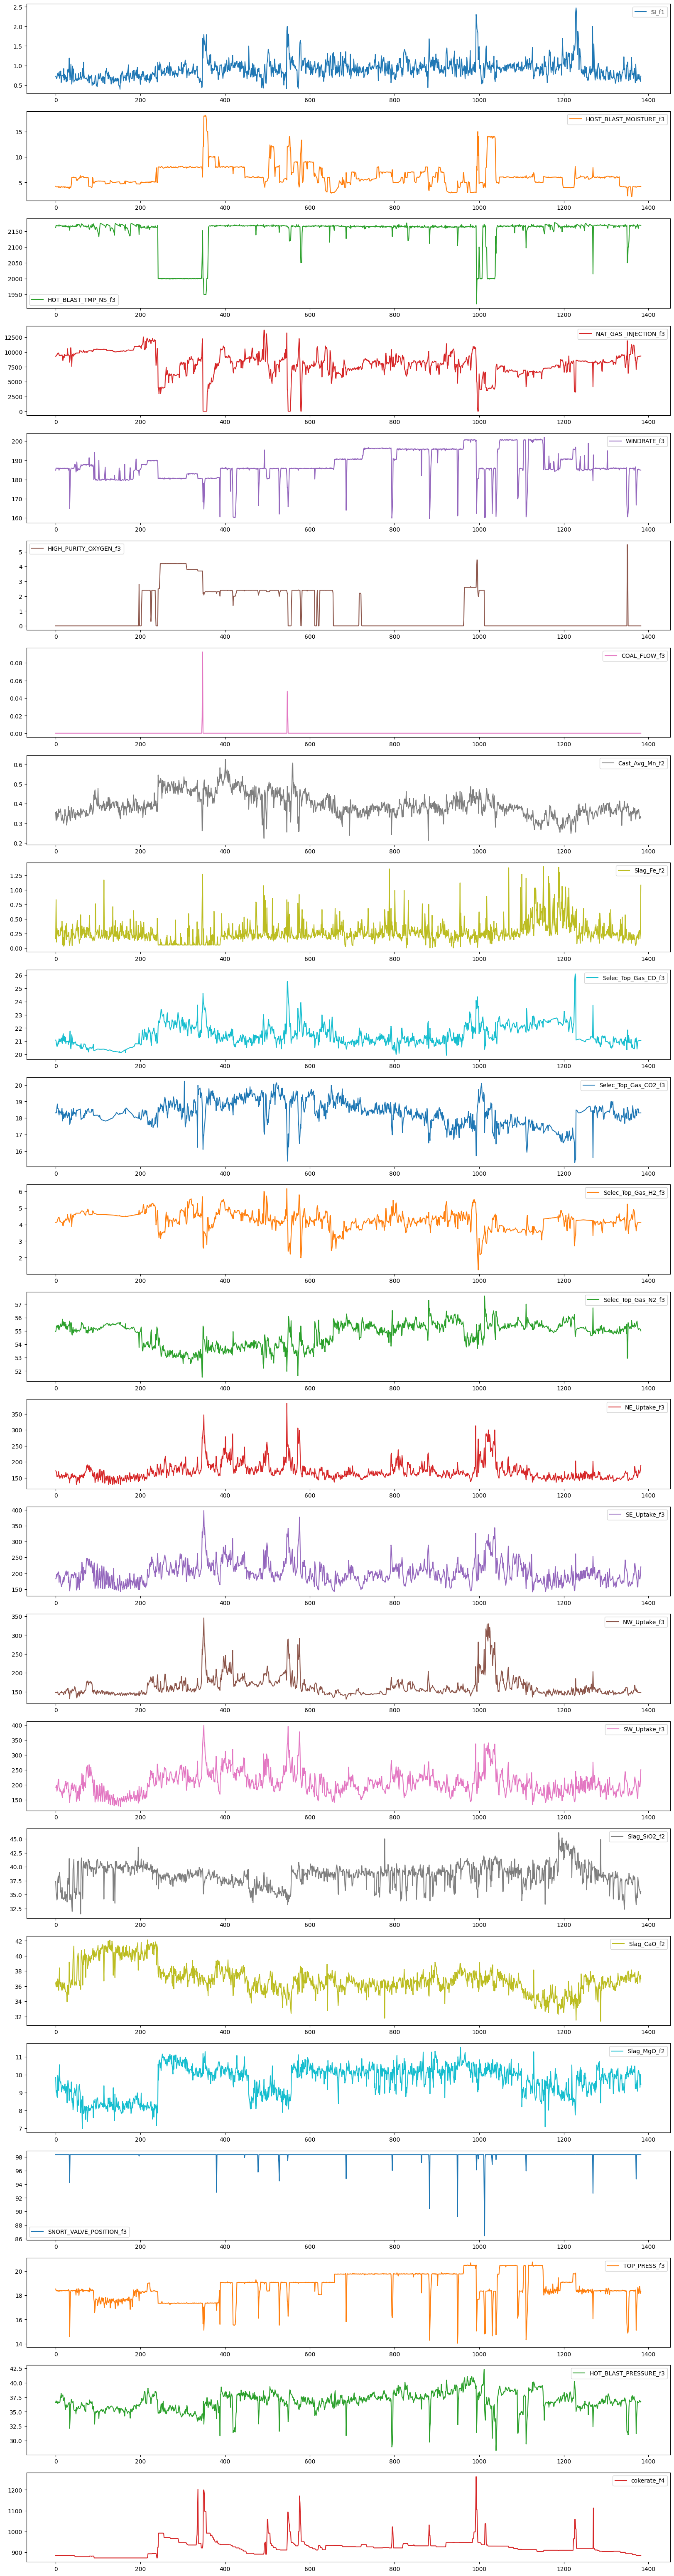

In [14]:

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [15]:

print(for_RNN_data_CIVS.shape)


(1383, 24)



## Parameters


In [16]:

pd.options.display.max_columns = None



## Standardize (Scaling)


In [17]:

def standardize_x_scales( data_gpt_pd ):


    data_gpt = torch.tensor(data_gpt_pd.values).float()
        
    epsilon = 0.0001

    print( data_gpt.shape)        
    
    x_means      = data_gpt .mean(0,  keepdim=True)
    x_deviations = data_gpt .std( 0,  keepdim=True) + epsilon

    ## x_train_tr_scaled = (x_train_tr - x_means) / x_deviations
    ## y_test_tr_scaled  = (y_test_tr  - y_means) / y_deviations
    
    return data_gpt, x_means, x_deviations


In [18]:

## x_means      = simple_x_train.mean(0, keepdim=True ) 
## x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon



## Shift and create batches


In [19]:

def get_batch( data_gpt ):
    
    ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )

    ## ix = [ int( tensor1.item() ) for tensor1 in ix ]
    ## print(ix.shape)
    ## print(ix)
    ## print(ix[1])
    ## print(  type(ix[1])  )
    ## print( len(data_gpt) - block_size )
    ## print(  block_size )
    ## print(  (batch_size,)  )
    
    x  = torch.stack(    [  data_gpt[   i   : i+block_size    ]   for i in ix ]    ) 
    y  = torch.stack(    [  data_gpt[   i+1 : i+1+block_size  ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [20]:

'''

train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs

bt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )

bt_train_x.shape

bt_train_y.shape

x_means

'''


'\n\ntrain_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )\n\ntrain_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs\n\nbt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )\n\nbt_train_x.shape\n\nbt_train_y.shape\n\nx_means\n\n'


## Estimate loss - No Training


In [21]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'test']:
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch( split )
            logits  = model(X, Y)
            B, T, E  = logits.shape
            pred     = logits.view( B*T, E)
            y_train  = Y.view(B*T, E)
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  ## back to training

    return out



## NN Architectures


In [22]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [23]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)


In [24]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [25]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x


In [26]:

class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        ## self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 24)  ## [512, 65] # FFW Layer

        self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        B = idx.shape[0]       ## 8
        T = idx.shape[1]       ## 20
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  

        idx = self.map_24_512( idx )

        tok_emb = idx       ## (8, 20, 24)
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  

        ## print("blue")
        ## print(tok_emb.shape)
        ## print(pos_emb.shape)
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [8, 20, 24]

        ## self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        
        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            


In [27]:

def train_model_GPT( train_CIVS_2 ):
 
    
    model  = Time_Series_GPT(block_size, 24, 24)
    model  = model.to( device )
    
    optimizer       = torch.optim.Adam(     model.parameters(), lr=learning_rate   )
    ## optimizer    = torch.optim.RMSprop(  model.parameters(), lr=learning_rate   )

    ## criterion       = nn.MSELoss()
    criterion       = nn.L1Loss()
    ## criterion_kl    = nn.KLDivLoss(reduction="batchmean")
    
    history = {'loss': [], 'test_loss': []}

    ## train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )
    
    train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS_2 )

    train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs
        
    model.train()
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        ## xb, yb = get_batch('train')
        xb, yb    = get_batch( train_CIVS_tr_scaled )

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        pred           = logits.view( B*T, E)
        y_train        = yb.view(B*T, E)

        ## loss_cost = 0.0
        ## loss =  ( 1.0-loss_cost ) * criterion( pred, y_train ) + ( loss_cost ) * criterion( pred[:, 0], y_train[:, 0]  ) 

        #######################################################
        ## ind1 = random.randrange(0, y_train.shape[0] - 3)
        ## ind2 = ind1 + 3
        ## loss =  criterion( pred[ind1:ind2, 0], y_train[ind1:ind2, 0] )
        #######################################################

        ## loss =  criterion( pred, y_train )  ## seems better
        loss = criterion( pred[:, 0], y_train[:, 0]  ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()

        history['loss'].append(  loss.item()  )

        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item() )

    
    return model, history, x_means, x_standard_devs



## Parameters


In [28]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 15   ## 20     ## 4          ## 40      ## N tokens in sequence
batch_size        = 32 
max_iters         = 10000   ## 5000
eval_interval     = 500     
learning_rate     = 0.0001
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 512   ## 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2



## Utility Functions


In [29]:

def GPT_get_batch_test( test_data ):
    
    ## x_time_series = torch.tensor(test_data.values).float()

    x_time_series = test_data

    print( x_time_series.shape )

    x  = torch.stack(   [   x_time_series[ 0 : -1    ]    ]    ) 
    y  = torch.stack(   [   x_time_series[ 1 :       ]    ]   )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [30]:

def GPT_generate_inference(model, x_test, which_feature, string_feature, train_CIVS_2_a ):

    xb_test, yb_test = GPT_get_batch_test( x_test )
    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ :,  : 5 ]
    print("input to m.generate")
    print(input_test_x.shape)


    pred_20_seq = model.generate( input_test_x, 14 )

    print("shape of model generated output: ")
    print(pred_20_seq.shape)

    
    y_pred_gpt     = pred_20_seq.detach().cpu().numpy() 
    y_real_gpt     =     yb_test.detach().cpu().numpy() 
    
    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    
    y_real_gpt = y_real_gpt.squeeze(0)
    y_pred_gpt = y_pred_gpt.squeeze(0)

    print( "unscaling" )

    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    l_real = y_real_gpt[ :, 0]
    l_pred = y_pred_gpt[ :, 0]

    si_mean         = x_means[0, 0].numpy()
    si_standard_dev = x_standard_devs[0, 0].numpy()

    print("these: ")
    print( x_means.shape )
    print( l_pred.shape )
    print( si_standard_dev.shape )
    print( si_mean.shape )
    print( si_standard_dev )
    print( si_mean)
    print( l_pred )
    

    ## y_descaled = y_scaled * self.y_deviations + self.y_means
    l_pred        = l_pred   * si_standard_dev   + si_mean
    l_real        = l_real   * si_standard_dev   + si_mean

    print( l_pred )
    
    print("unscale si end")


    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    print( l_pred  )
    print( l_real )

    print( l_pred.shape  )
    print( l_real.shape  )

    
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
    print(l_real)
    print(l_pred)
    print( "Testing R**2: ", r2_score(  l_real,  l_pred     )  )


    #######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
 
    ##print( l_pred[1:].shape )
    ##print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:, ], l_pred[0] ) )
    
    l_pred = np.roll(l_pred, -1)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

    ##########################################

    train_plot = torch.tensor(train_CIVS_2_a.values).float().numpy()
    print( train_plot.shape )
    train_real_plot = train_plot[:, 0]
    ## l_real  = np.concatenate( ( train_real_plot[1: ], train_real_plot[:1] ) )
    l_real  = np.concatenate( ( train_real_plot, l_real ) )
    l_pred  = np.concatenate( ( train_real_plot, l_pred ) )
    ######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

 

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT Generate')
    ##ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ##ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].scatter(x, l_real, label = "real", color='red') 
    ax[0].plot(   x, l_real, label = "real", color='red') 
    ax[0].scatter(x, l_pred, label = "pred", color='blue') 
    ax[0].plot(   x, l_pred, label = "pred", color='blue') 
    ax[0].legend()
    
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()


In [31]:

def function_train_rc(  train_data  ):
    train_CIVS_2 = train_data
    si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT( train_CIVS_2 )

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT  Train  Loss  per epoch')
    ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].legend()
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()

    return si_GPT, history_GPT, x_means, x_standard_devs 

    

In [32]:

def function_test_rc( train_data, test_CIVS, si_GPT, x_means, x_standard_devs):
    train_CIVS_2 = train_data
    
    print(  test_CIVS.shape )
    print( train_data.shape )
    ## print( train_data[ -5: ] )

    frames           = [ train_data[ -5: ], test_CIVS ]
    test_CIVS_concat = pd.concat( frames )
    print( test_CIVS_concat.shape )

    test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()
    test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs
    print(  test_CIVS_tr_scaled.shape )

    batch_x_test = test_CIVS_tr_scaled
    print( batch_x_test.shape )
    GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI", train_CIVS_2 )



## The Data


In [33]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0


## Pick slice randomly


In [34]:

training_chunk = 400


In [35]:

length_n  = int( for_RNN_data_CIVS.shape[0] )

length_n


1383


## Run 1


In [36]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


501

In [37]:

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )


1383
501
916


In [38]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]


In [39]:

sliced_chunk_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
501  1.227600                5.724690          2165.995102   
502  1.413253                5.821990          2167.611994   
503  1.355136                6.994524          2167.445640   
504  1.298627                9.957139          2166.806484   
505  0.978860                9.867538          2165.939099   
..        ...                     ...                  ...   
911  1.003145                7.115515          2167.500562   
912  0.846635                7.006549          2162.886630   
913  0.887799                6.982876          2163.466772   
914  0.832483                7.057129          2163.172012   
915  0.793554                7.003879          2162.993737   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
501            8235.721738   180.244396               2.298426           0.0   
502            7743.410741   180.568828               2.299908           0.0   
503            7780.156605   180.463246               2.301285           0.0   
504            6527.171929   180.672670               2.300337           0.0   
505            6241.485038   180.644095               2.300852           0.0   
..                     ...          ...                    ...           ...   
911            7901.144202   195.318009               0.000000           0.0   
912            7850.198631   195.964807               0.000000           0.0   
913            8015.327540   195.886964               0.000000           0.0   
914            8058.750793   195.732670               0.000000           0.0   
915            7923.137576   196.118966               0.000000           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
501           0.488        0.21            21.756278             17.938223   
502           0.465        0.25            22.395659             17.724922   
503           0.493        0.15            22.643966             18.000683   
504           0.510        0.18            22.134350             18.557775   
505           0.491        0.20            22.247157             18.551586   
..              ...         ...                  ...                   ...   
911           0.368        0.31            20.879505             18.321502   
912           0.341        0.30            20.830303             17.991101   
913           0.375        0.44            20.907361             18.351635   
914           0.362        0.50            21.224307             17.865287   
915           0.332        0.23            21.453243             18.054559   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
501             4.541117            54.511972    223.185864    253.177354   
502             4.215377            54.412715    227.205189    250.810985   
503             4.370932            53.870897    215.786863    236.819538   
504             4.272247            53.780744    174.134384    208.277114   
505             4.219132            53.615561    168.151487    215.392872   
..                   ...                  ...           ...           ...   
911             4.494655            55.334286    154.065858    181.331763   
912             4.466087            55.521314    149.051476    184.671161   
913             4.337055            55.339329    155.038474    189.306475   
914             4.409592            55.453949    161.999035    189.010384   
915             4.394304            54.934619    157.537326    197.785926   

     NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
501    206.121696    260.720418     35.310001    36.139999         8.76   
502    197.893532    286.861042     36.900002    36.660000         9.31   
503    202.235650    270.073488     35.290001    36.880001         8.75   
504    173.762718    222.610979     35.950001    36.930000         9.07   
505    175.696095    223.459163     36.779999    36.860001       


## Train and test


In [40]:

n = block_size

print( n )


15


In [41]:

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]


In [42]:

print( train_CIVS.shape )
print( test_CIVS.shape )


(400, 24)
(15, 24)


In [43]:

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


In [44]:

print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.9231662154197693
500 train loss =  0.07745743542909622
1000 train loss =  0.05916502699255943
1500 train loss =  0.049109406769275665
2000 train loss =  0.03380265086889267
2500 train loss =  0.031699344515800476
3000 train loss =  0.027674516662955284
3500 train loss =  0.023726291954517365
4000 train loss =  0.021512717008590698
4500 train loss =  0.02325790375471115
5000 train loss =  0.017703548073768616
5500 train loss =  0.014591298997402191
6000 train loss =  0.014130006544291973
6500 train loss =  0.014558244496583939
7000 train loss =  0.01491294801235199
7500 train loss =  0.011502484790980816
8000 train loss =  0.011491354554891586
8500 train loss =  0.010805128142237663
9000 train loss =  0.009766134433448315
9500 train loss =  0.009664943441748619


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


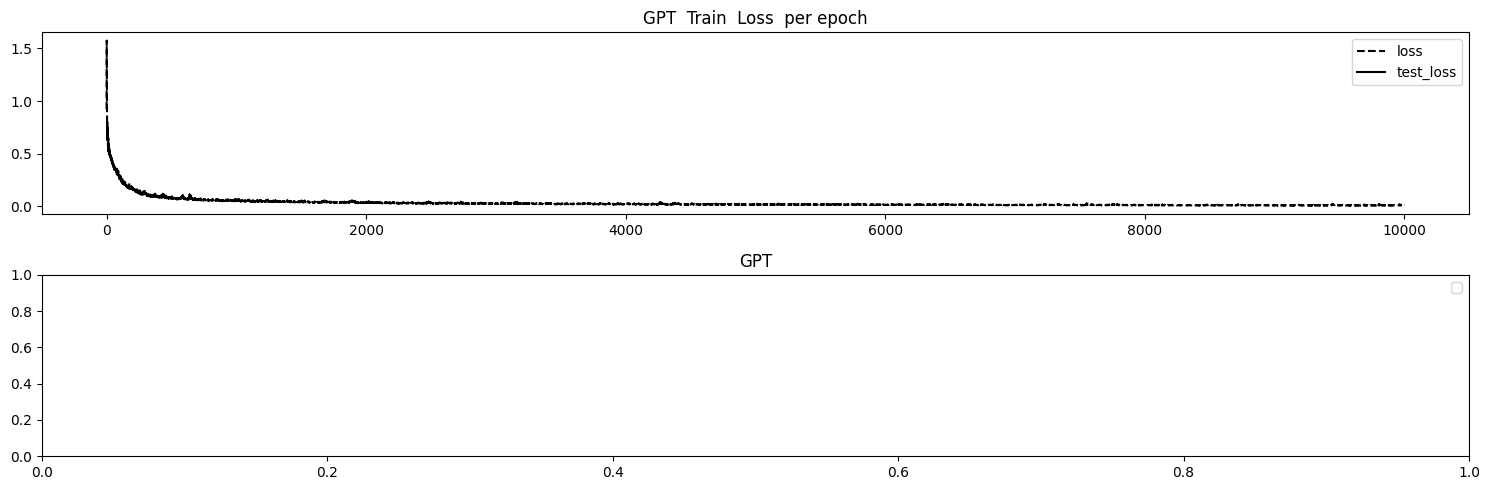

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

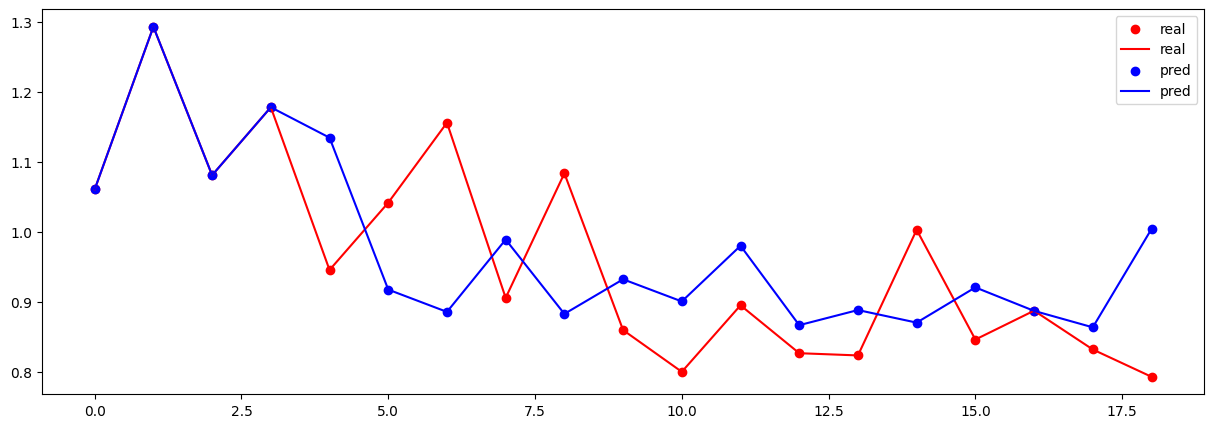

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


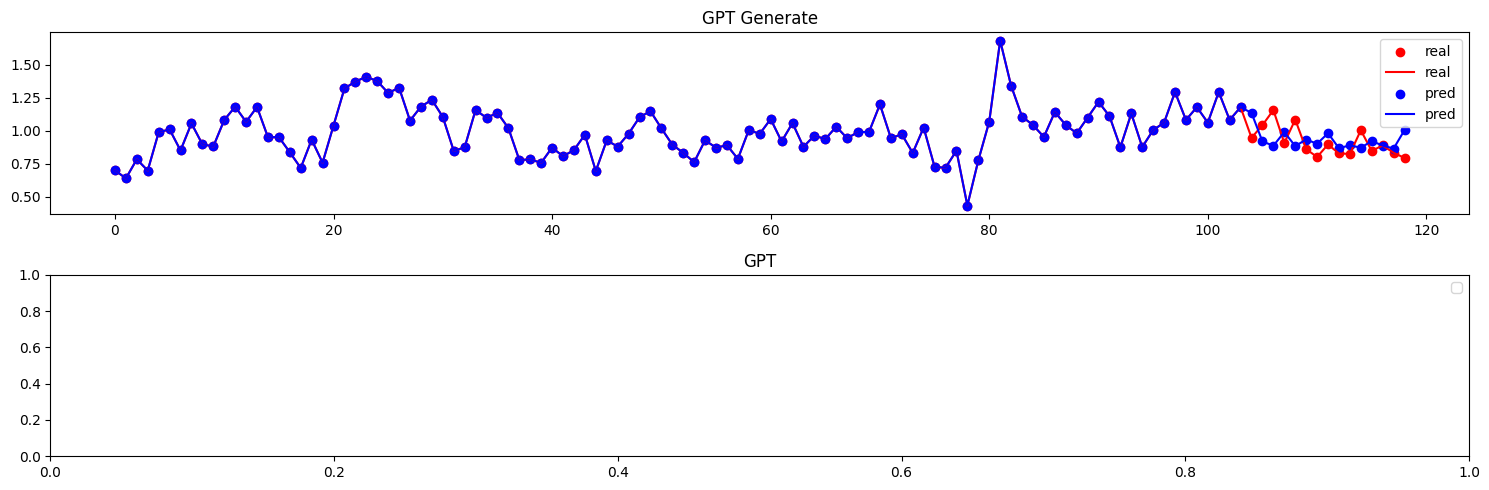

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  0.9750032424926758
500 train loss =  0.1423928290605545
1000 train loss =  0.07461600750684738
1500 train loss =  0.05775726959109306
2000 train loss =  0.0510074757039547
2500 train loss =  0.05068545788526535
3000 train loss =  0.033968735486269
3500 train loss =  0.03427456319332123
4000 train loss =  0.02412625402212143
4500 train loss =  0.026476725935935974
5000 train loss =  0.0252824854105711
5500 train loss =  0.022989170625805855
6000 train loss =  0.020300008356571198
6500 train loss =  0.01895759254693985
7000 train loss =  0.02043205127120018
7500 train loss =  0.0158642940223217
8000 train loss =  0.015043332241475582
8500 train loss =  0.014988035894930363
9000 train loss =  0.01844853349030018
9500 train loss =  0.011263784021139145


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


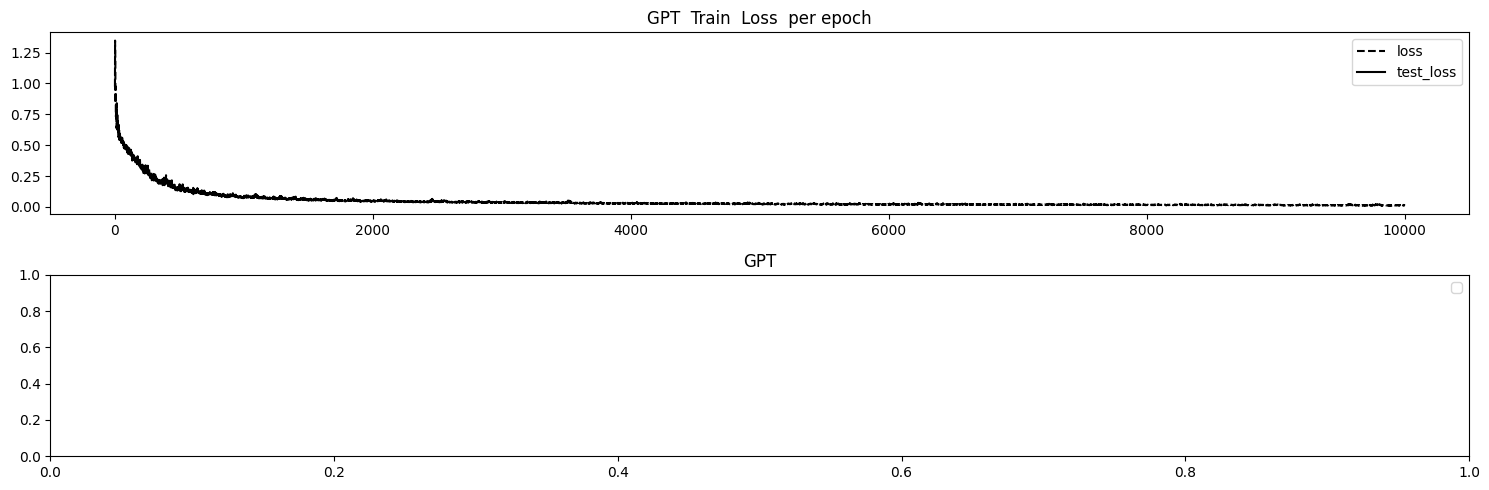

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

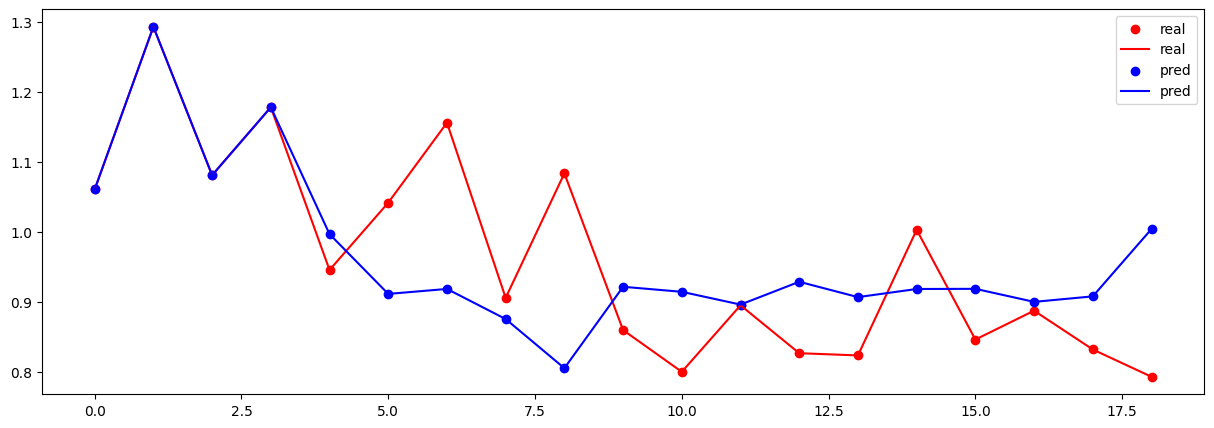

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


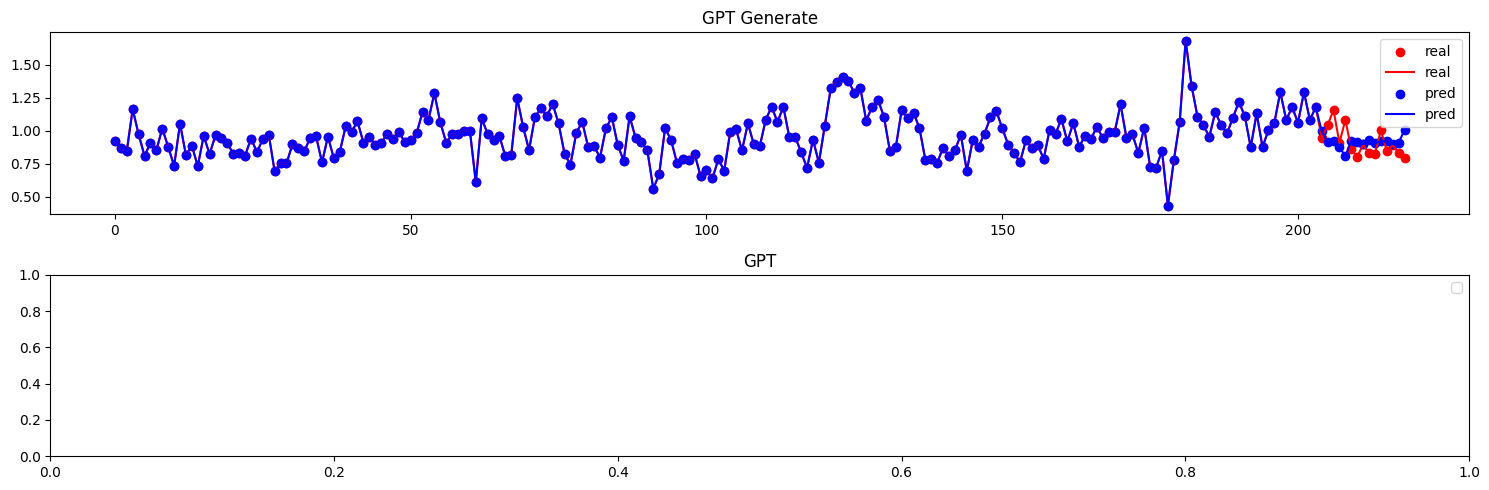

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 24])
0 train loss =  0.8231486678123474
500 train loss =  0.23595130443572998
1000 train loss =  0.10031504184007645
1500 train loss =  0.07399824261665344
2000 train loss =  0.056170880794525146
2500 train loss =  0.051334597170352936
3000 train loss =  0.04229264333844185
3500 train loss =  0.04253372922539711
4000 train loss =  0.03305729106068611
4500 train loss =  0.032086171209812164
5000 train loss =  0.026456942781805992
5500 train loss =  0.029669491574168205
6000 train loss =  0.024447327479720116
6500 train loss =  0.022908633574843407
7000 train loss =  0.02448429726064205
7500 train loss =  0.020198334008455276
8000 train loss =  0.019325925037264824
8500 train loss =  0.01858378015458584
9000 train loss =  0.01769128255546093
9500 train loss =  0.017432404682040215


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


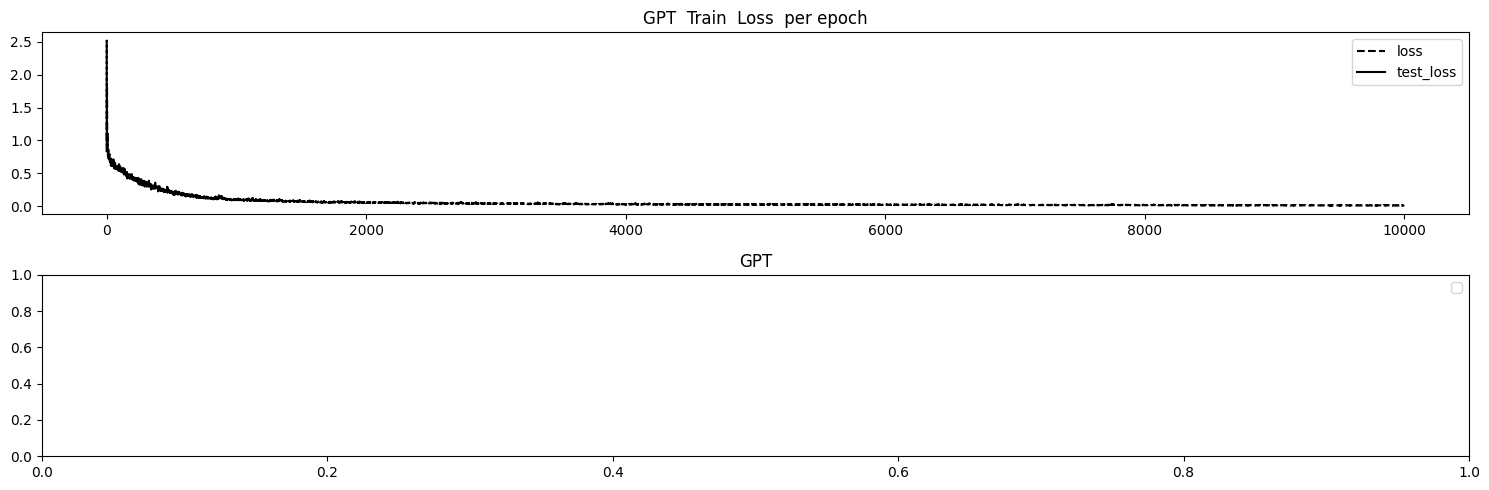

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

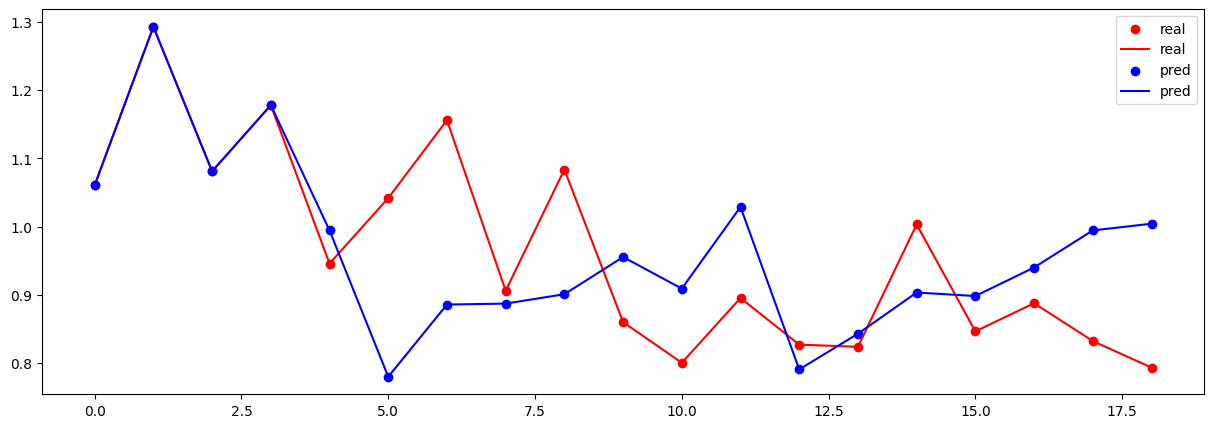

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(300, 24)
319


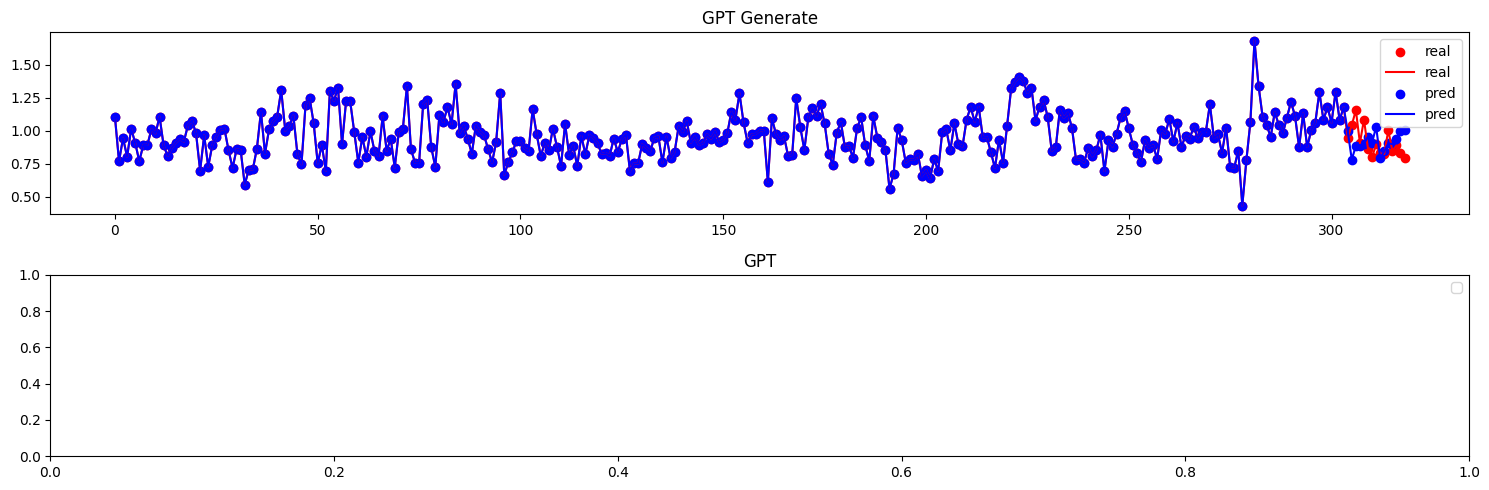

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.7499191761016846
500 train loss =  0.32957571744918823
1000 train loss =  0.1820077747106552
1500 train loss =  0.08432462066411972
2000 train loss =  0.06796543300151825
2500 train loss =  0.06650662422180176
3000 train loss =  0.05311446636915207
3500 train loss =  0.04655606299638748
4000 train loss =  0.03645012527704239
4500 train loss =  0.03586737811565399
5000 train loss =  0.03235360234975815
5500 train loss =  0.03246983513236046
6000 train loss =  0.030859991908073425
6500 train loss =  0.03208353742957115
7000 train loss =  0.02619962766766548
7500 train loss =  0.026140235364437103
8000 train loss =  0.023723339661955833
8500 train loss =  0.021203527227044106
9000 train loss =  0.019263552501797676
9500 train loss =  0.02162265218794346


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


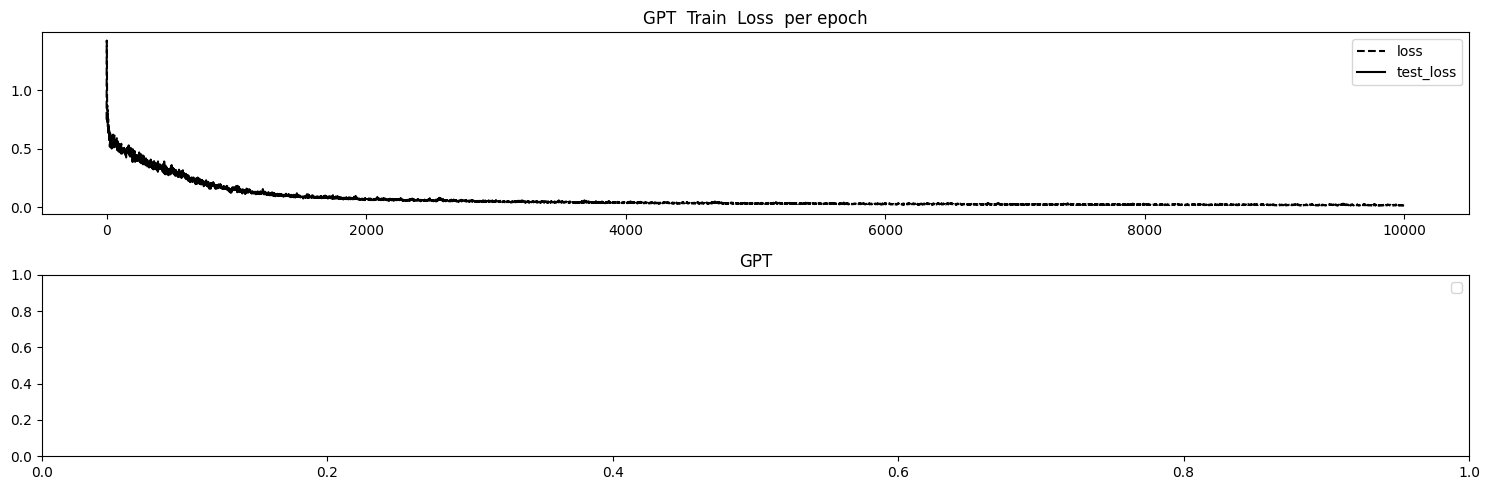

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

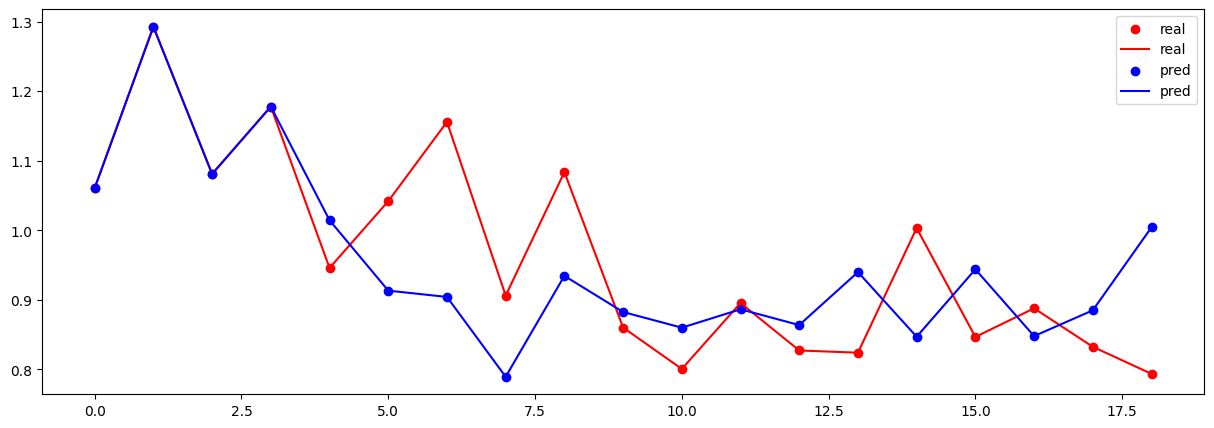

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(400, 24)
419


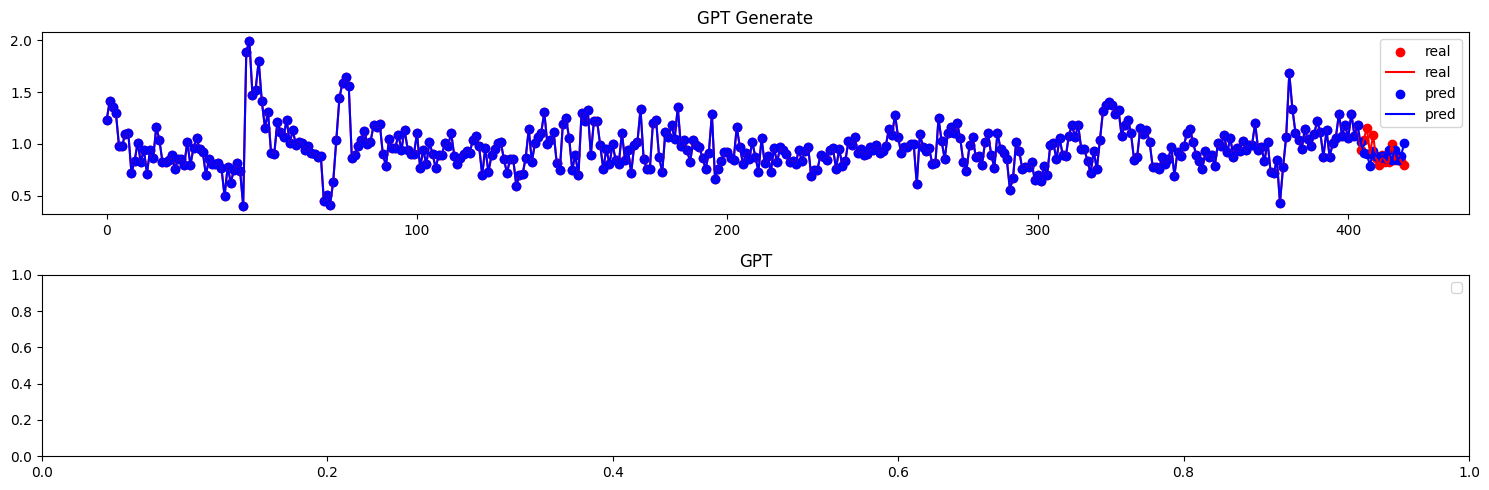

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 2


In [49]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ]  


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )





1383
72
487
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.9448500871658325
500 train loss =  0.10239004343748093
1000 train loss =  0.05497787147760391
1500 train loss =  0.04905763640999794
2000 train loss =  0.03203534334897995
2500 train loss =  0.025419726967811584
3000 train loss =  0.023550888523459435
3500 train loss =  0.023307444527745247
4000 train loss =  0.02301323413848877
4500 train loss =  0.018743159249424934
5000 train loss =  0.017558781430125237
5500 train loss =  0.01243583858013153
6000 train loss =  0.02016378380358219
6500 train loss =  0.01496695913374424
7000 train loss =  0.011895474046468735
7500 train loss =  0.010600252076983452
8000 train loss =  0.01021561399102211
8500 train loss =  0.011089496314525604
9000 train loss =  0.009181536734104156
9500 train loss =  0.010529845952987671


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


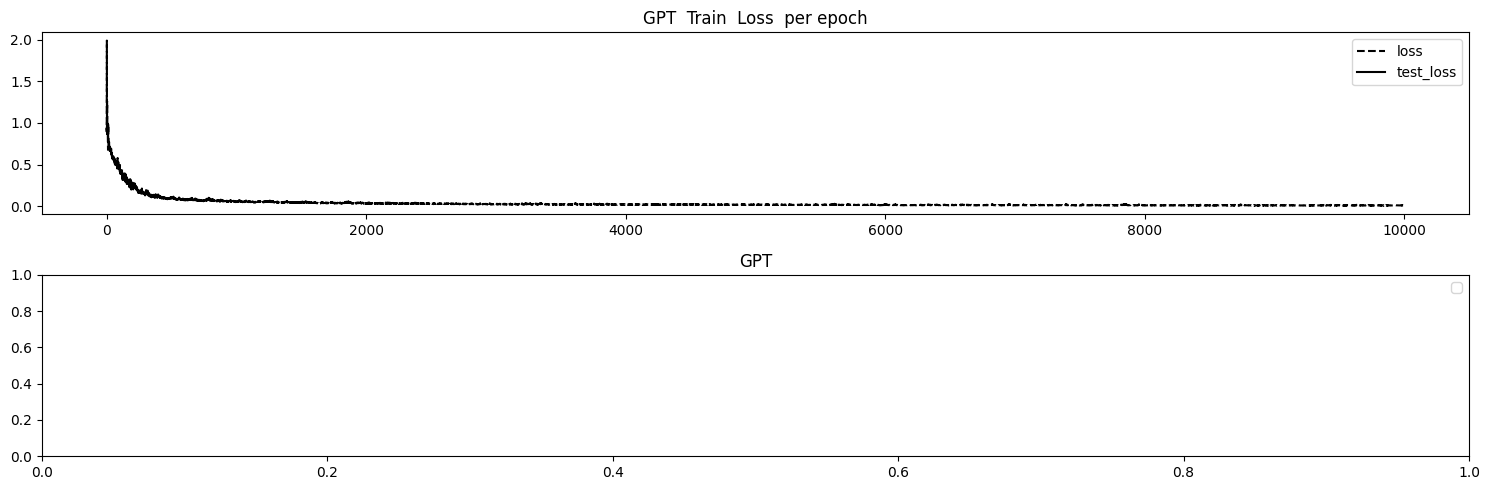

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

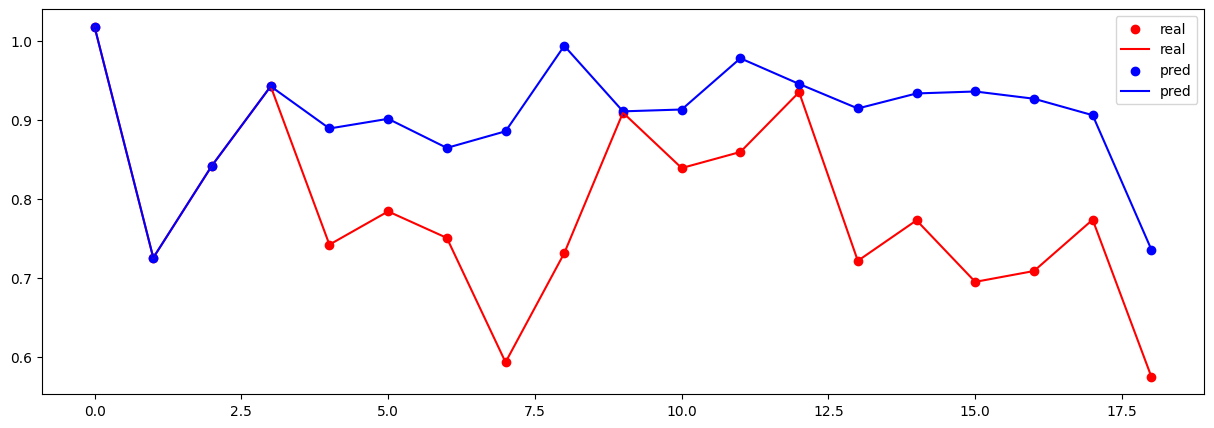

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


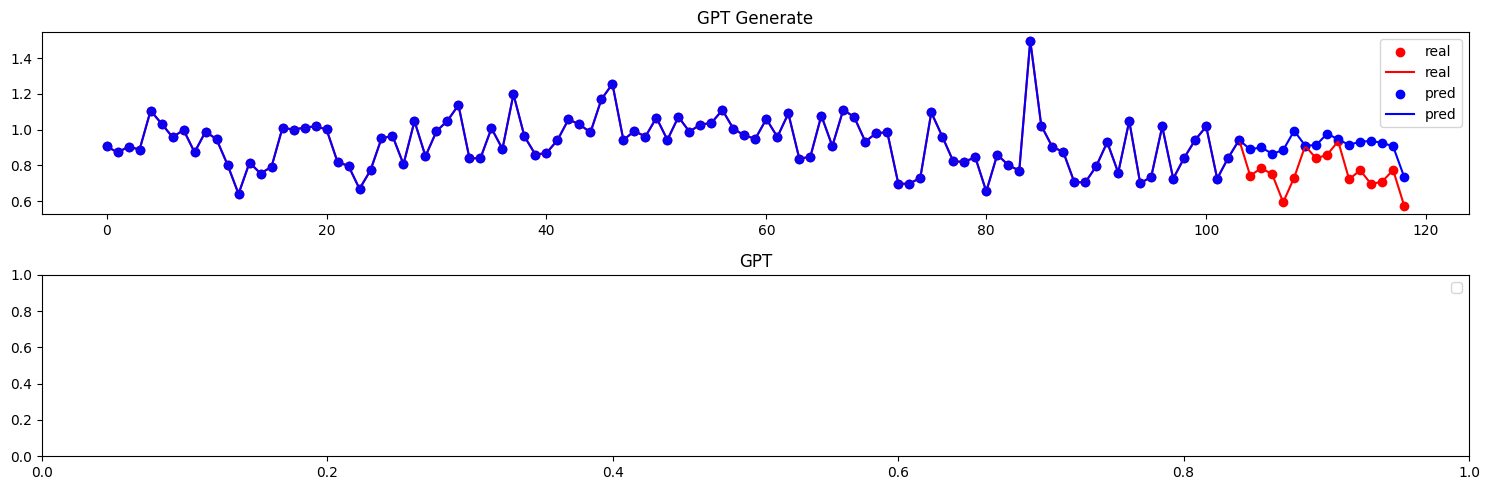

In [50]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.9162930250167847
500 train loss =  0.17797307670116425
1000 train loss =  0.06316622346639633
1500 train loss =  0.05585870519280434
2000 train loss =  0.057425130158662796
2500 train loss =  0.03769451007246971
3000 train loss =  0.03297216817736626
3500 train loss =  0.03057931363582611
4000 train loss =  0.03282390534877777
4500 train loss =  0.024736031889915466
5000 train loss =  0.021079454571008682
5500 train loss =  0.01980382390320301
6000 train loss =  0.018847370520234108
6500 train loss =  0.016627831384539604
7000 train loss =  0.014668113552033901
7500 train loss =  0.012460936792194843
8000 train loss =  0.012339286506175995
8500 train loss =  0.016042601317167282
9000 train loss =  0.014989936724305153
9500 train loss =  0.014358707703649998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


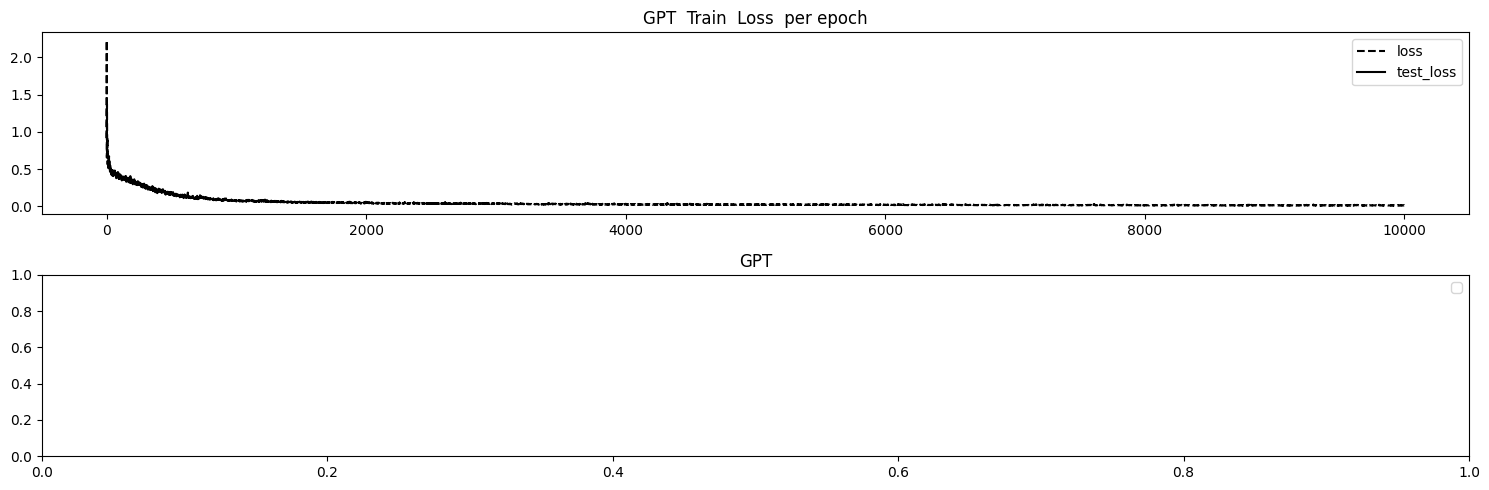

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

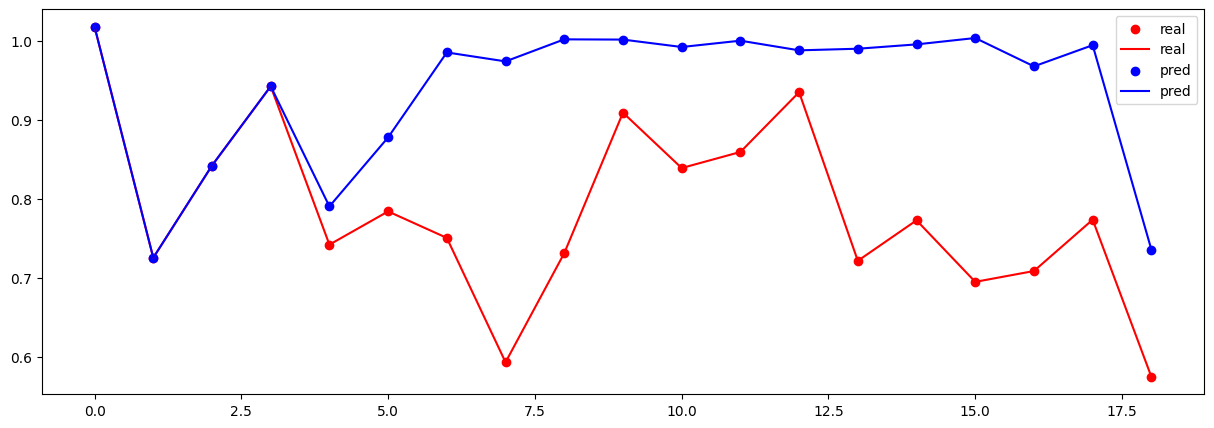

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


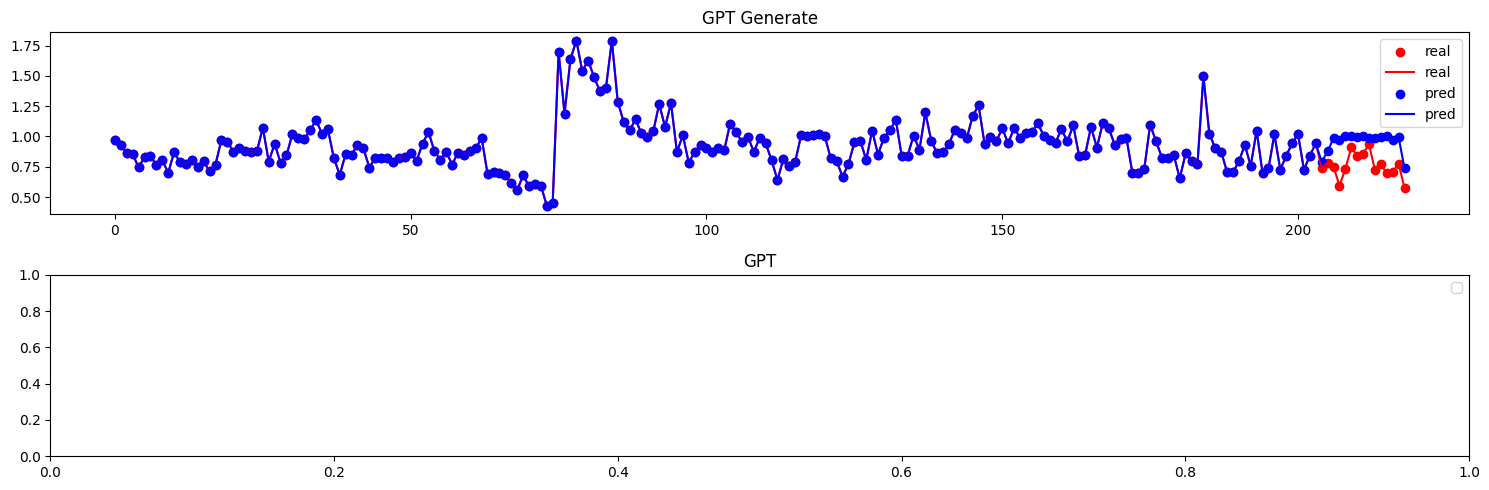

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 24])
0 train loss =  0.870947003364563
500 train loss =  0.2558819651603699
1000 train loss =  0.1261289119720459
1500 train loss =  0.08834834396839142
2000 train loss =  0.06775673478841782
2500 train loss =  0.05812358483672142
3000 train loss =  0.0461166575551033
3500 train loss =  0.03828374668955803
4000 train loss =  0.03296036273241043
4500 train loss =  0.03219129145145416
5000 train loss =  0.026654498651623726
5500 train loss =  0.025902459397912025
6000 train loss =  0.026031559333205223
6500 train loss =  0.020599497482180595
7000 train loss =  0.0215862188488245
7500 train loss =  0.01875540241599083
8000 train loss =  0.021568046882748604
8500 train loss =  0.02486700750887394
9000 train loss =  0.02121088281273842
9500 train loss =  0.0165104940533638


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


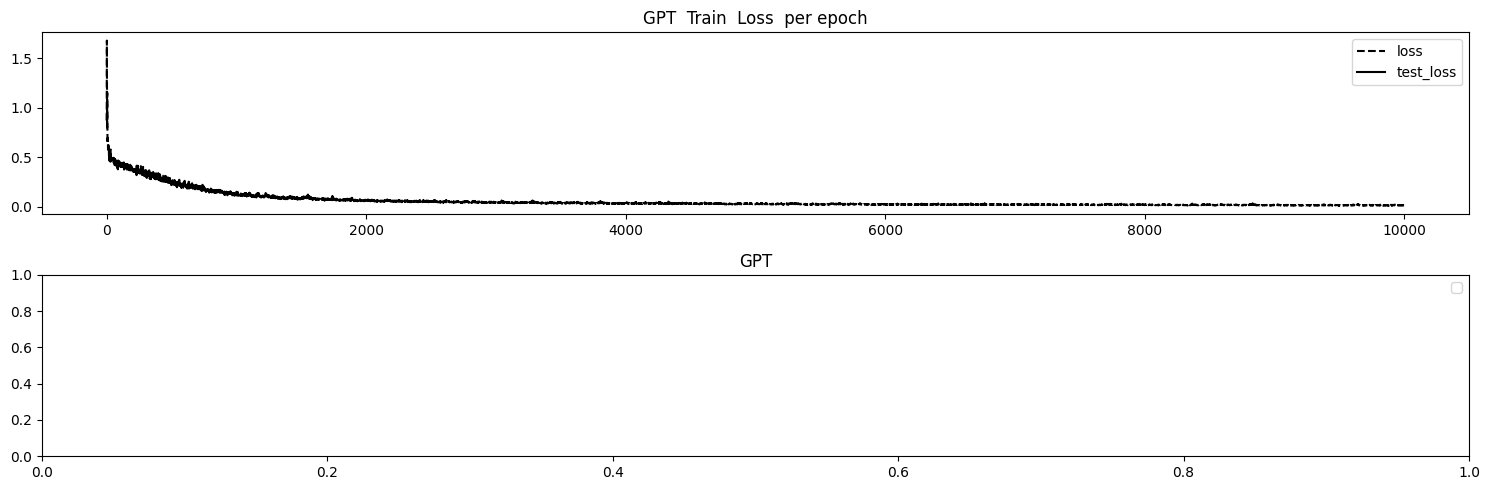

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

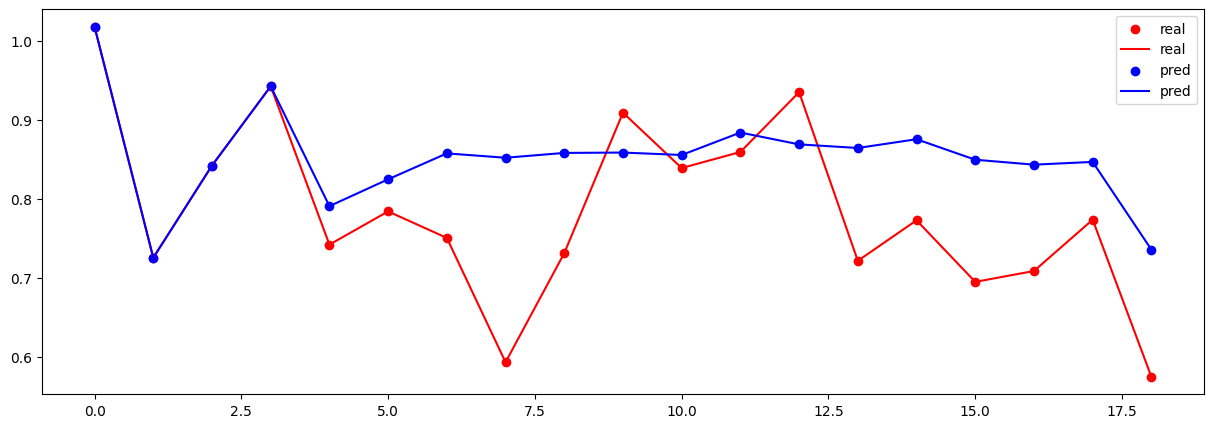

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(300, 24)
319


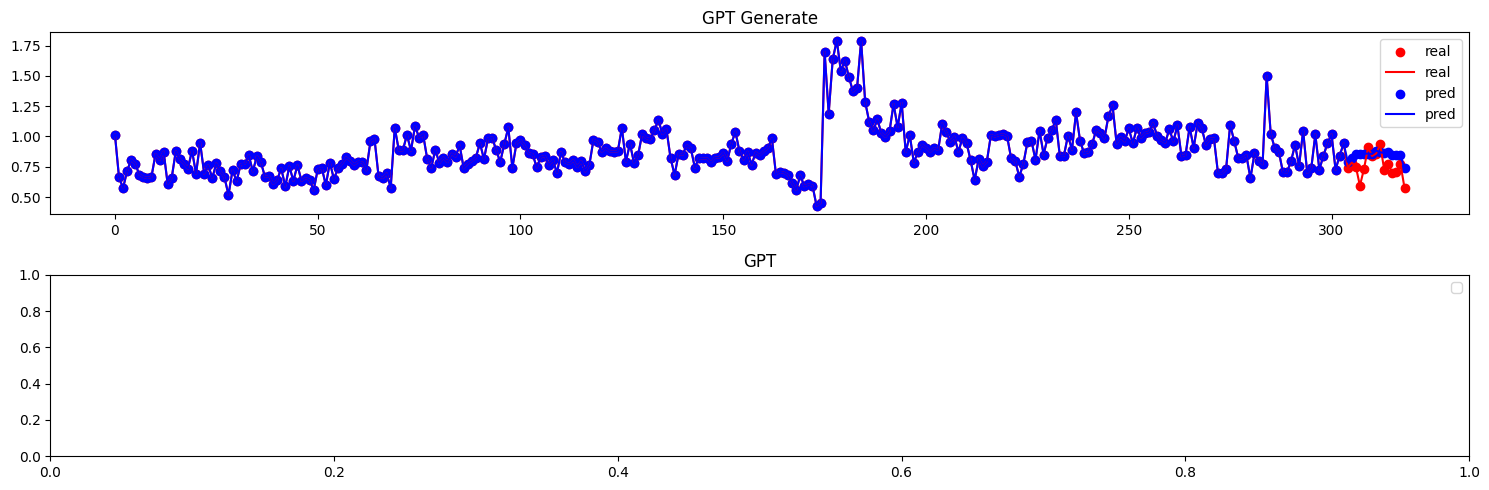

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.9870839715003967
500 train loss =  0.29385292530059814
1000 train loss =  0.18186461925506592
1500 train loss =  0.10682222247123718
2000 train loss =  0.07498162239789963
2500 train loss =  0.05566207692027092
3000 train loss =  0.054243169724941254
3500 train loss =  0.05075472220778465
4000 train loss =  0.04207201302051544
4500 train loss =  0.035445477813482285
5000 train loss =  0.043708886951208115
5500 train loss =  0.03093031421303749
6000 train loss =  0.02935236692428589
6500 train loss =  0.029392262920737267
7000 train loss =  0.028031641617417336
7500 train loss =  0.024434154853224754
8000 train loss =  0.02348763681948185
8500 train loss =  0.020602431148290634
9000 train loss =  0.017812415957450867
9500 train loss =  0.020484380424022675


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


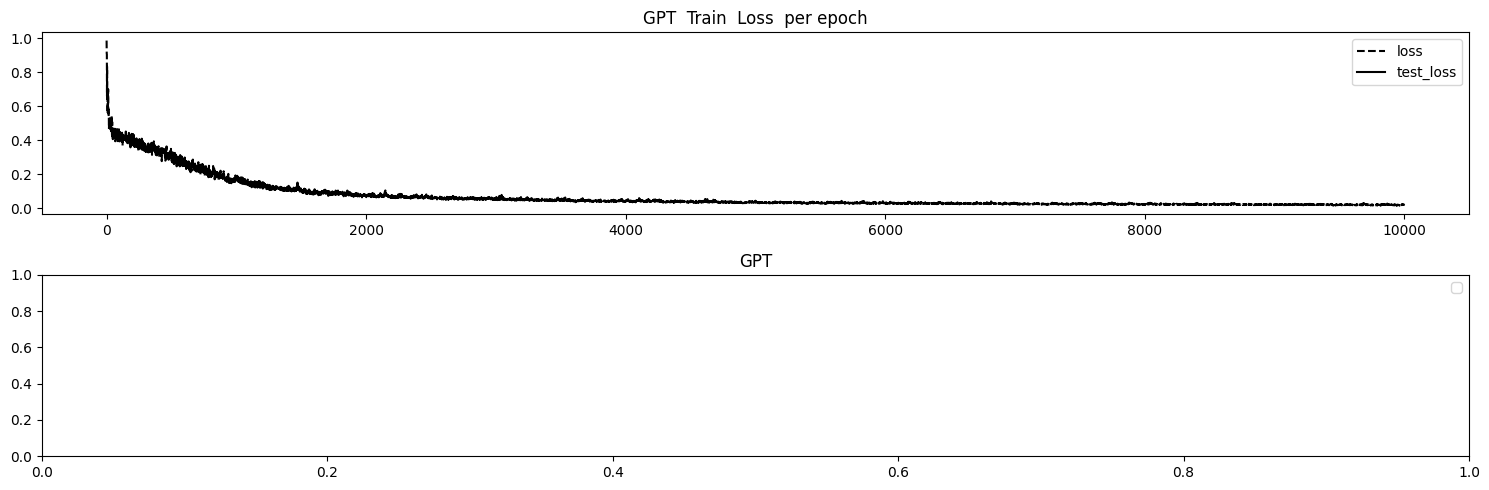

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

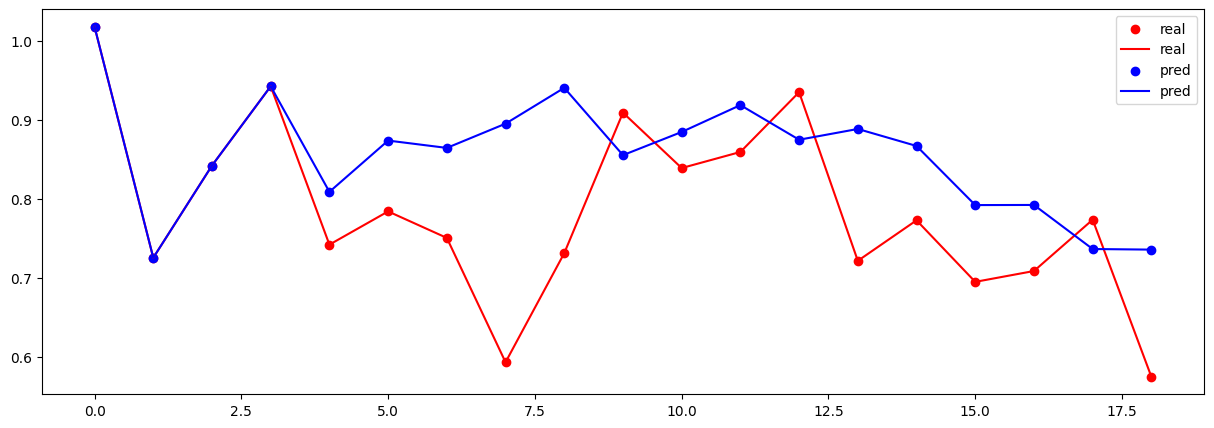

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(400, 24)
419


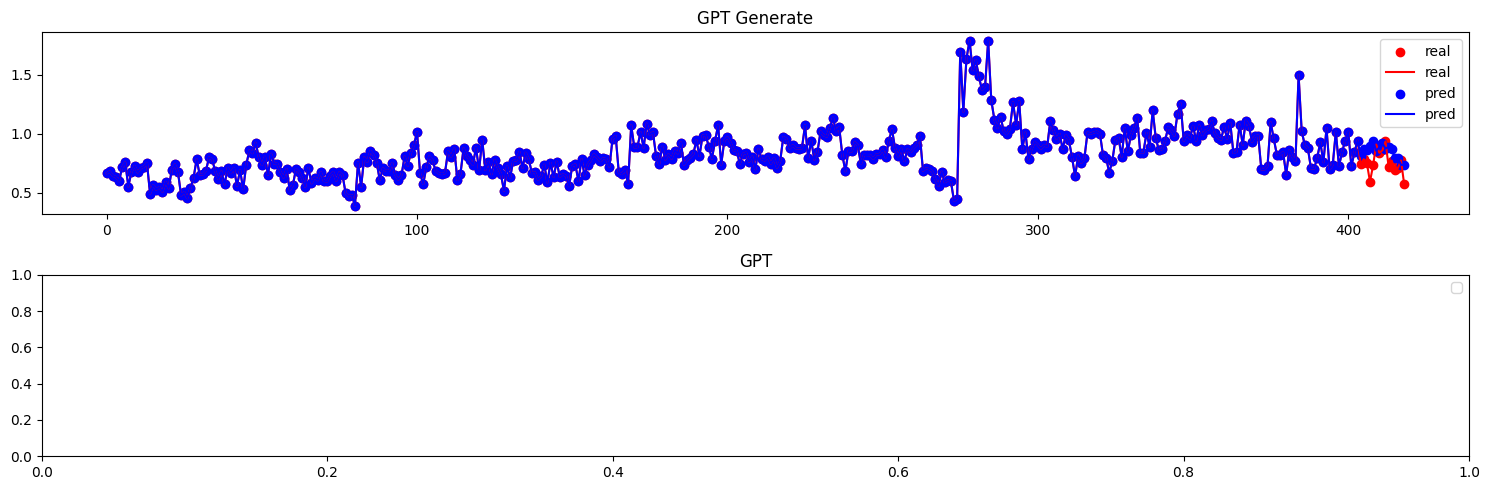

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 3


In [54]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )



1383
495
910
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.8436974287033081
500 train loss =  0.0784372016787529
1000 train loss =  0.0585559643805027
1500 train loss =  0.046103060245513916
2000 train loss =  0.03802258521318436
2500 train loss =  0.028519373387098312
3000 train loss =  0.024417027831077576
3500 train loss =  0.028949007391929626
4000 train loss =  0.02286752127110958
4500 train loss =  0.019394414499402046
5000 train loss =  0.019846726208925247
5500 train loss =  0.01616697572171688
6000 train loss =  0.014636538922786713
6500 train loss =  0.01321389339864254
7000 train loss =  0.019784826785326004
7500 train loss =  0.012539375573396683
8000 train loss =  0.010158378630876541
8500 train loss =  0.0106998011469841
9000 train loss =  0.010231913067400455
9500 train loss =  0.010340130887925625


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


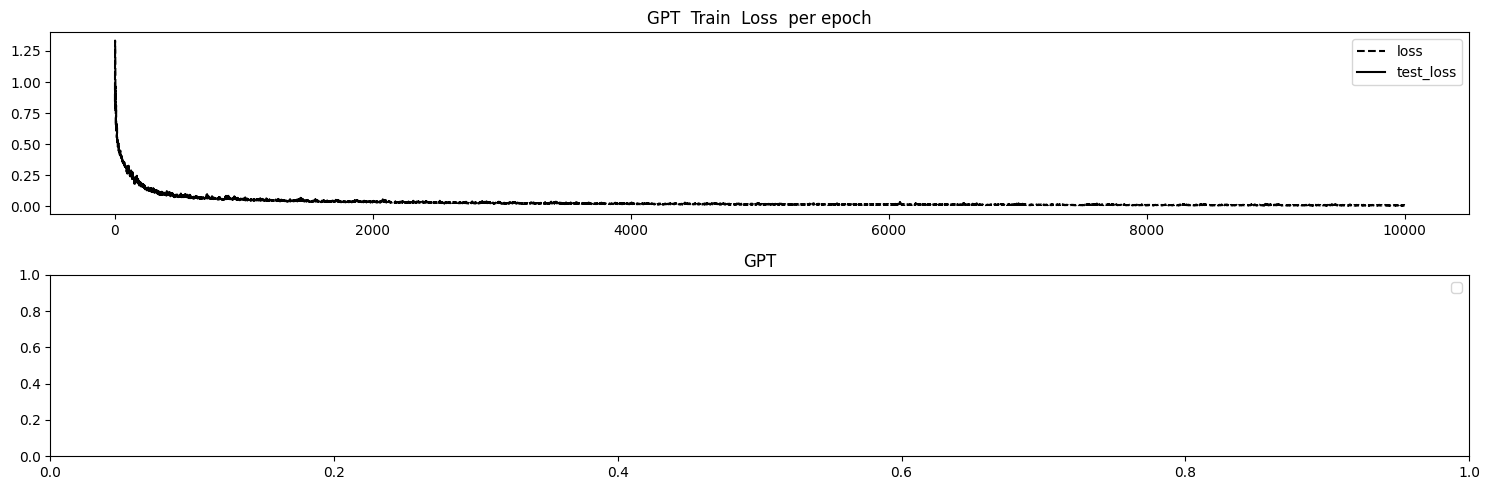

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

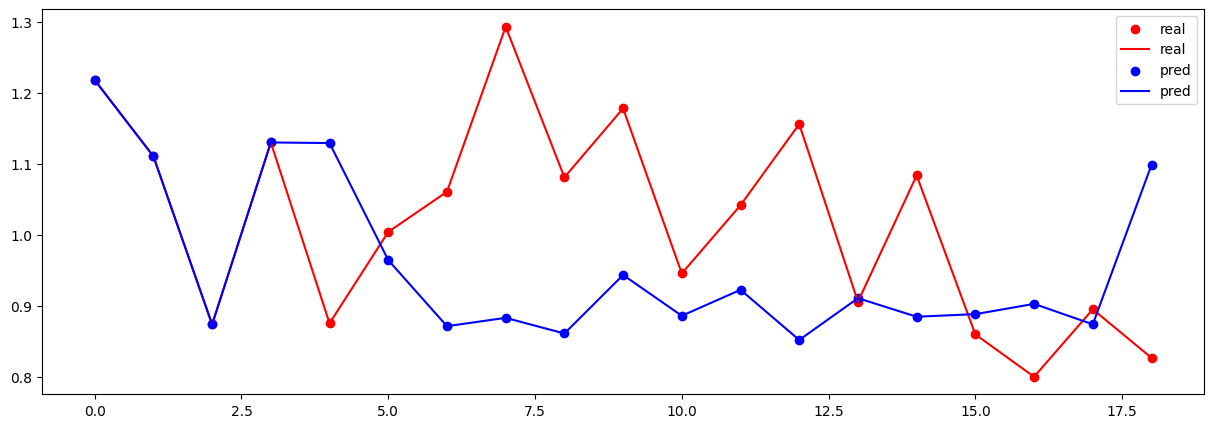

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


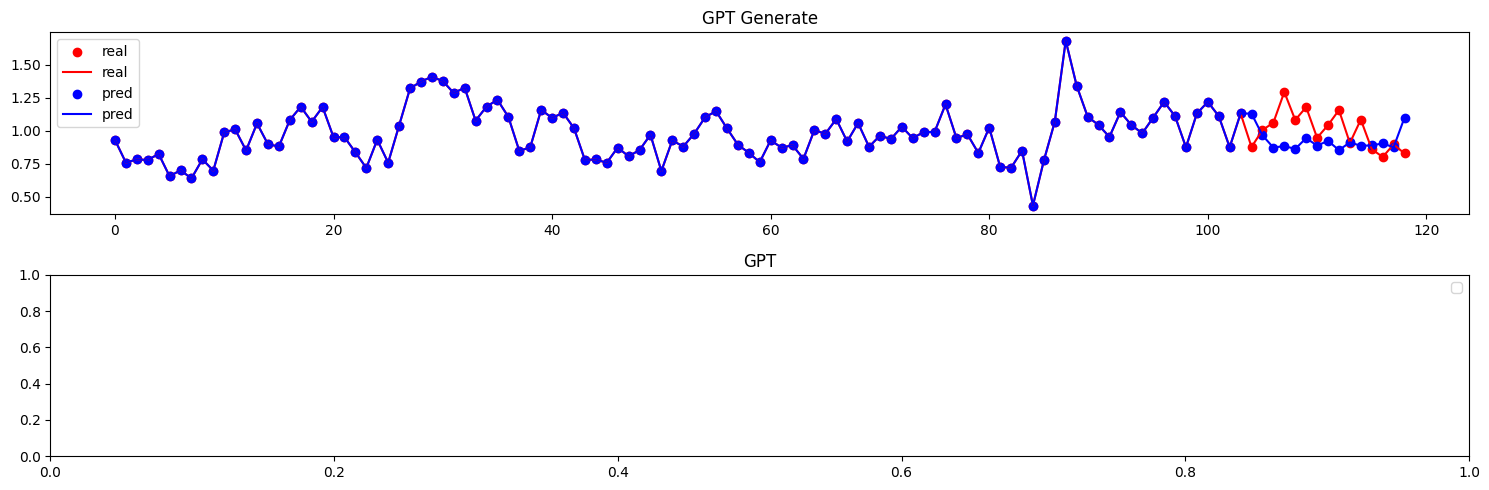

In [55]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.9148170948028564
500 train loss =  0.13153928518295288
1000 train loss =  0.08091779053211212
1500 train loss =  0.05928590148687363
2000 train loss =  0.05148777365684509
2500 train loss =  0.04762418568134308
3000 train loss =  0.03651534020900726
3500 train loss =  0.02971467934548855
4000 train loss =  0.03077651374042034
4500 train loss =  0.032104793936014175
5000 train loss =  0.02834809012711048
5500 train loss =  0.022296160459518433
6000 train loss =  0.022374503314495087
6500 train loss =  0.018996020779013634
7000 train loss =  0.016928311437368393
7500 train loss =  0.015743538737297058
8000 train loss =  0.01751060225069523
8500 train loss =  0.015890633687376976
9000 train loss =  0.014686920680105686
9500 train loss =  0.015858879312872887


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


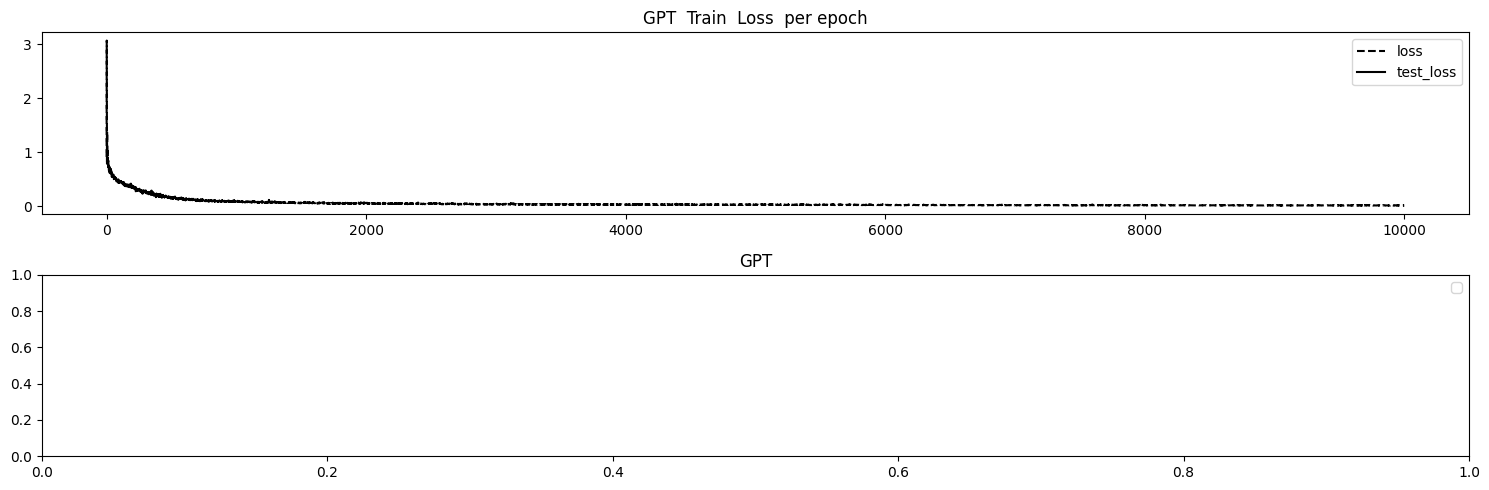

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

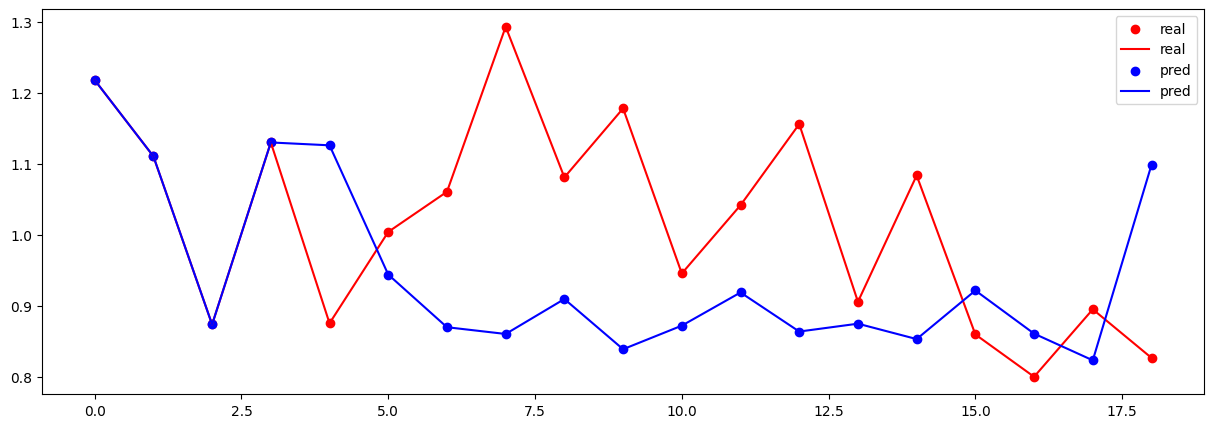

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


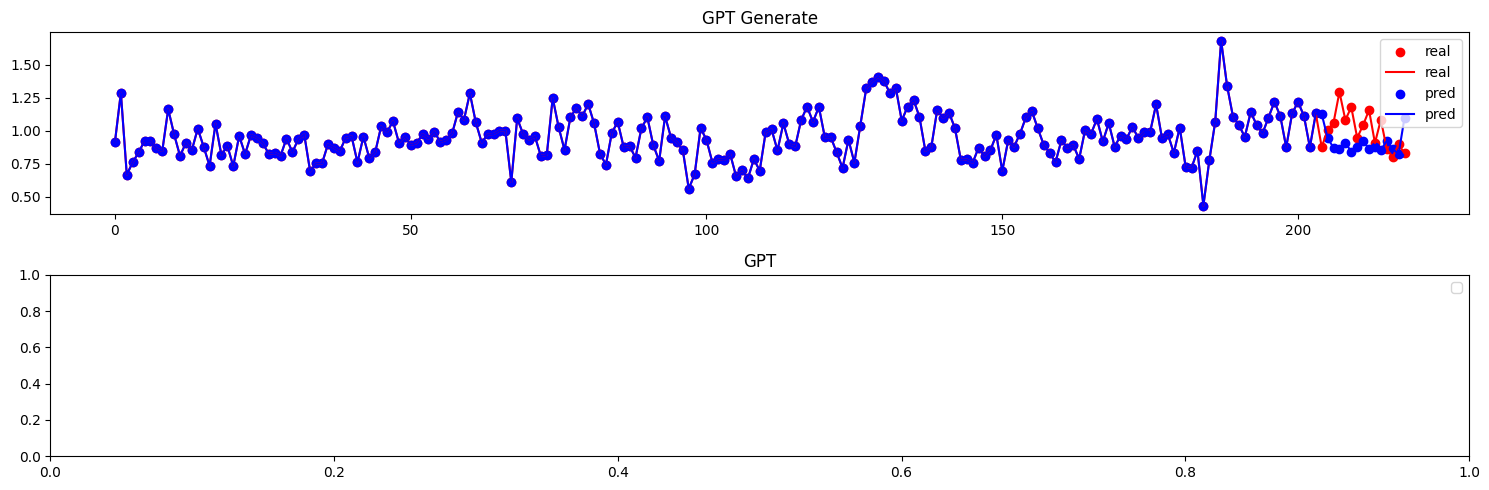

In [56]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 24])
0 train loss =  0.9824022054672241
500 train loss =  0.22680270671844482
1000 train loss =  0.10460537672042847
1500 train loss =  0.08096737414598465
2000 train loss =  0.06099028140306473
2500 train loss =  0.05211634933948517
3000 train loss =  0.04381077364087105
3500 train loss =  0.042262326925992966
4000 train loss =  0.03499066084623337
4500 train loss =  0.03222237527370453
5000 train loss =  0.029911424964666367
5500 train loss =  0.028227701783180237
6000 train loss =  0.027235135436058044
6500 train loss =  0.026410438120365143
7000 train loss =  0.02348952740430832
7500 train loss =  0.019793245941400528
8000 train loss =  0.021605217829346657
8500 train loss =  0.020199740305542946
9000 train loss =  0.01737971603870392
9500 train loss =  0.015483630821108818


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


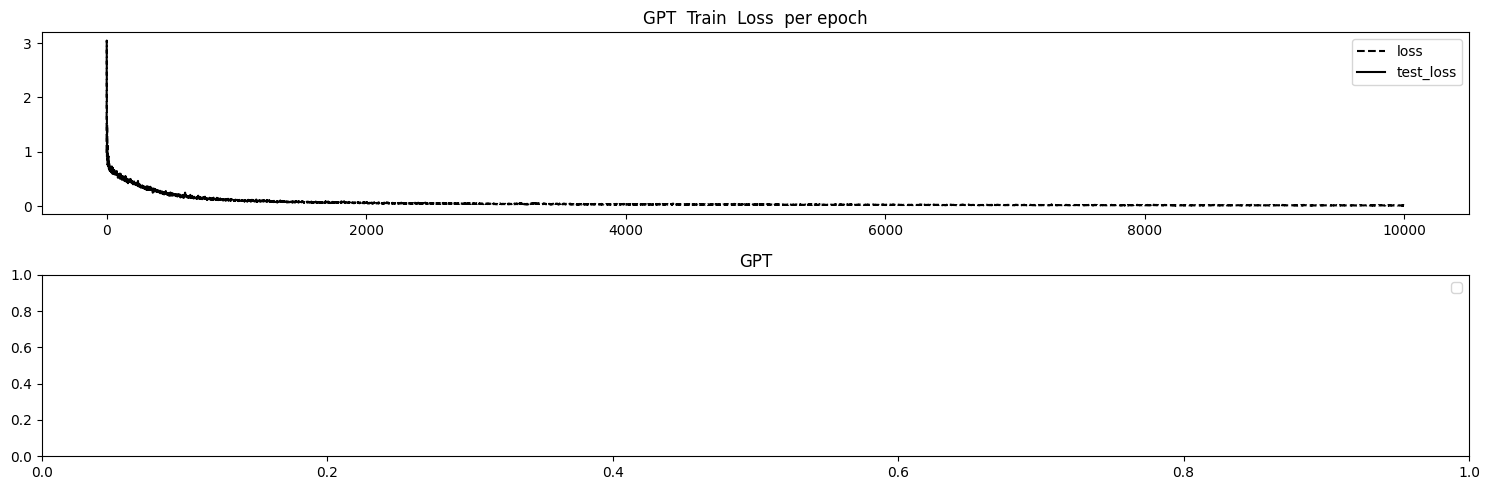

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

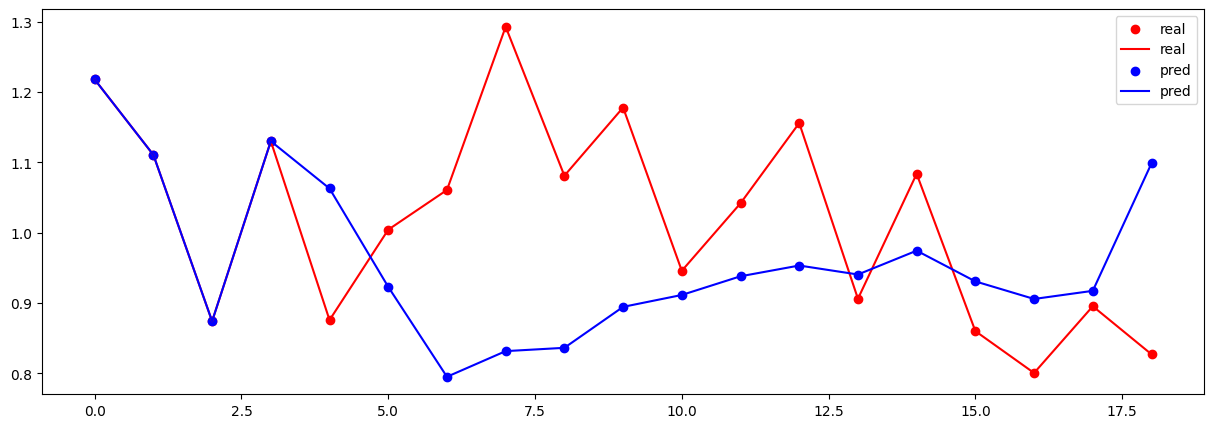

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(300, 24)
319


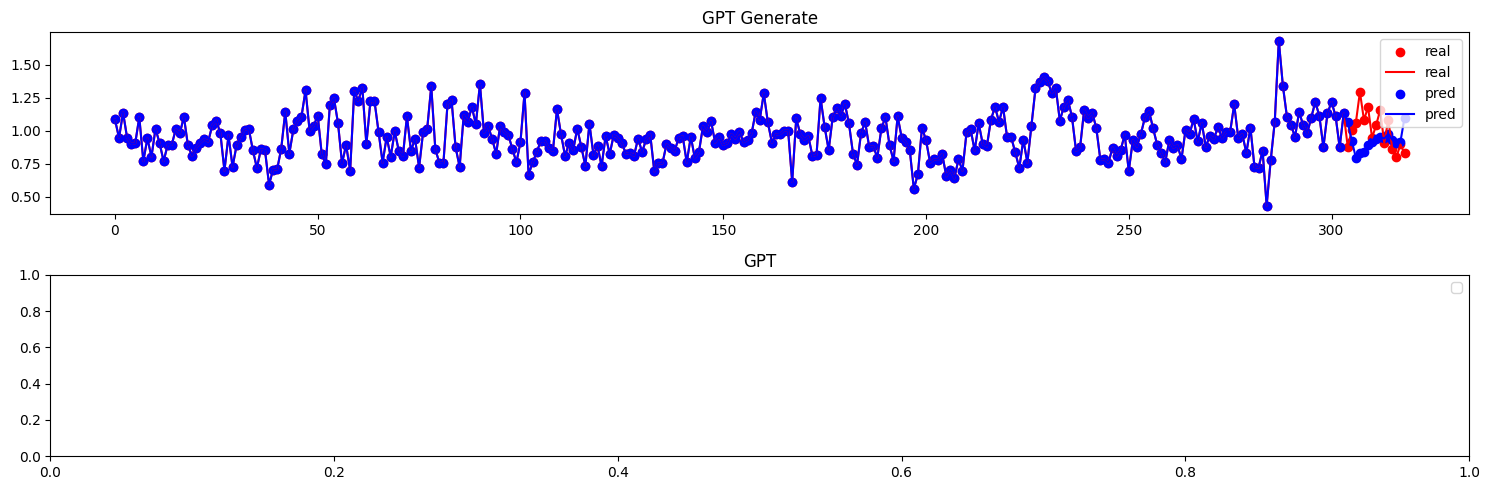

In [57]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.7415336966514587
500 train loss =  0.34733134508132935
1000 train loss =  0.18542373180389404
1500 train loss =  0.09284467995166779
2000 train loss =  0.07687044888734818
2500 train loss =  0.05579444020986557
3000 train loss =  0.052010536193847656
3500 train loss =  0.042440906167030334
4000 train loss =  0.04170278087258339
4500 train loss =  0.03735153749585152
5000 train loss =  0.03162290155887604
5500 train loss =  0.025422347709536552
6000 train loss =  0.029745519161224365
6500 train loss =  0.027848828583955765
7000 train loss =  0.028294363990426064
7500 train loss =  0.023546753451228142
8000 train loss =  0.02143847569823265
8500 train loss =  0.021942753344774246
9000 train loss =  0.02117701806128025
9500 train loss =  0.01931622438132763


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


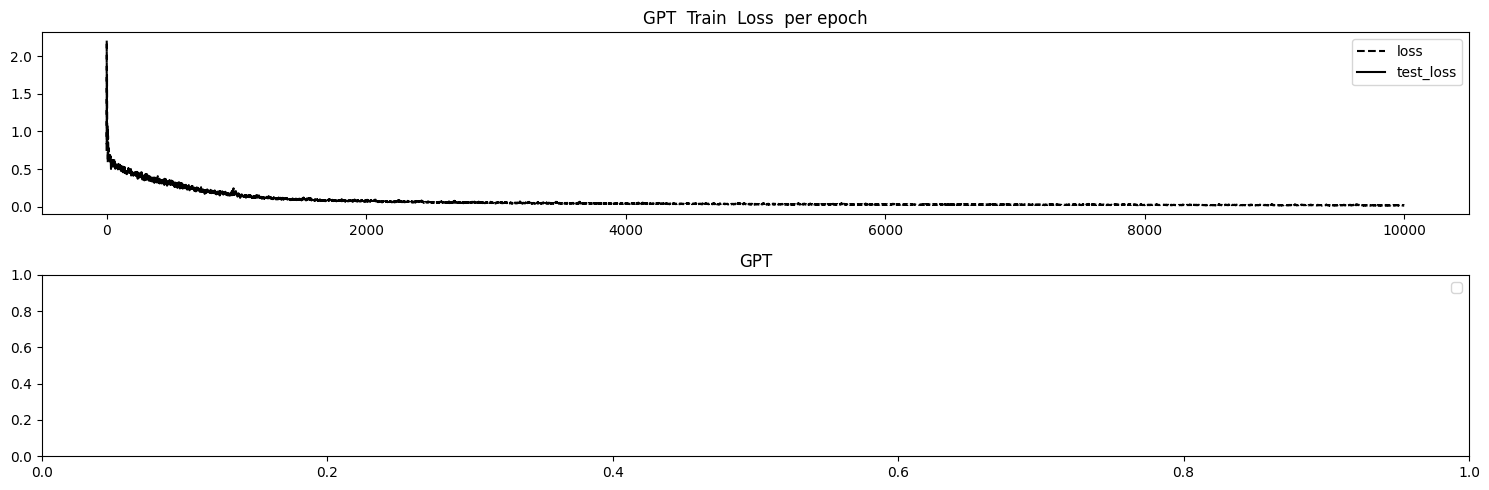

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

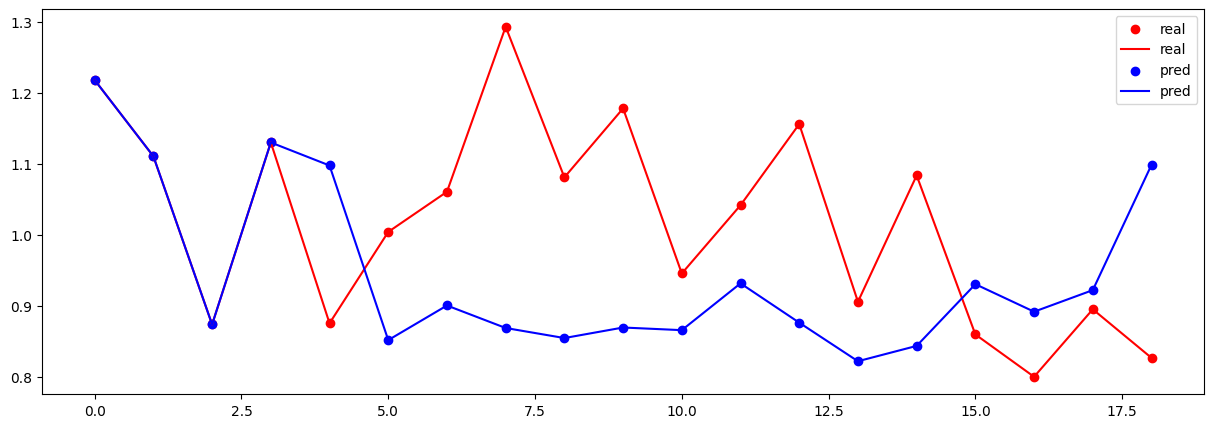

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(400, 24)
419


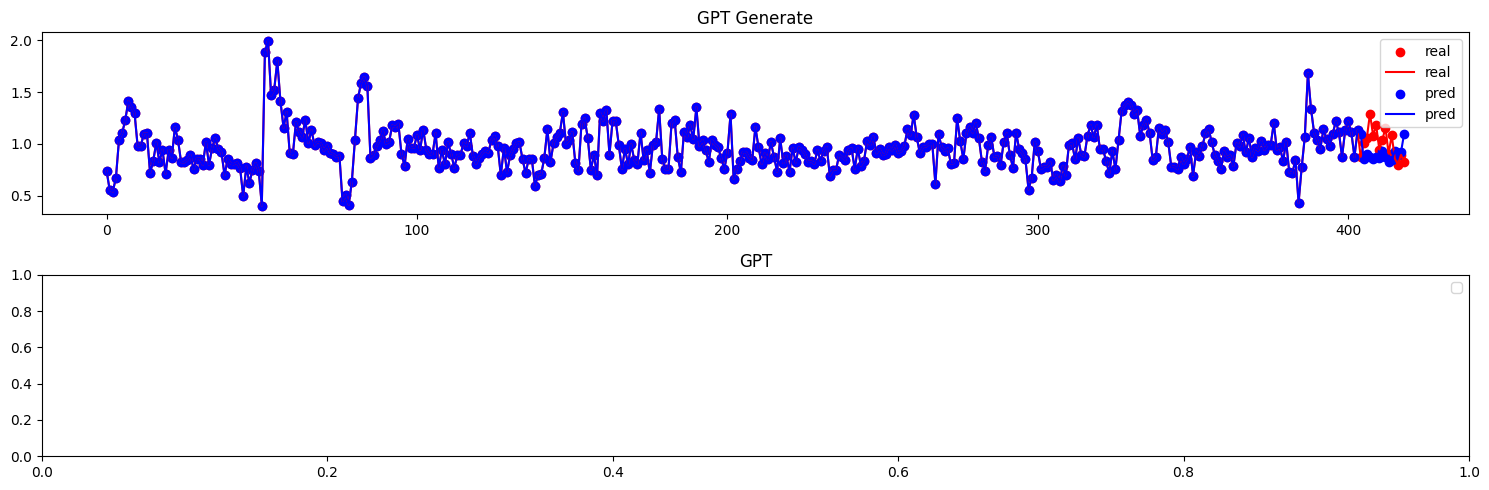

In [58]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 4


In [59]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
49
464
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.6577096581459045
500 train loss =  0.09152090549468994
1000 train loss =  0.04755038395524025
1500 train loss =  0.037826213985681534
2000 train loss =  0.029993318021297455
2500 train loss =  0.02979673631489277
3000 train loss =  0.023008912801742554
3500 train loss =  0.019375836476683617
4000 train loss =  0.01711796224117279
4500 train loss =  0.017087245360016823
5000 train loss =  0.014233758673071861
5500 train loss =  0.01272081583738327
6000 train loss =  0.014219218865036964
6500 train loss =  0.013647141866385937
7000 train loss =  0.020039619877934456
7500 train loss =  0.009118910878896713
8000 train loss =  0.011992799118161201
8500 train loss =  0.007366628386080265
9000 train loss =  0.007113057654350996
9500 train loss =  0.007181324064731598


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


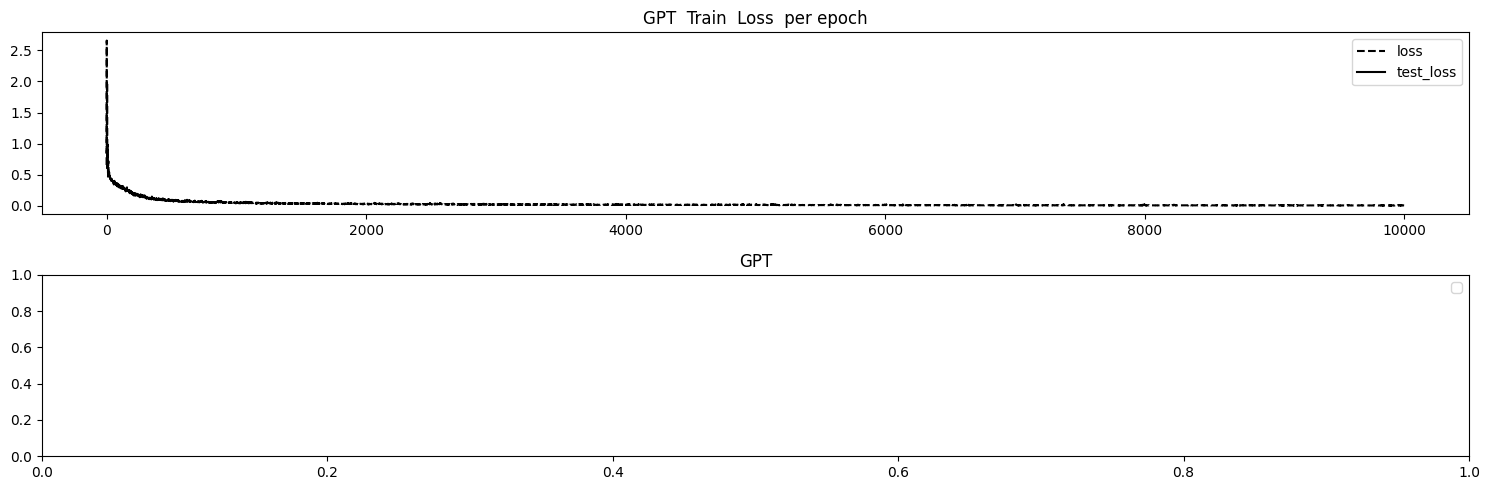

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

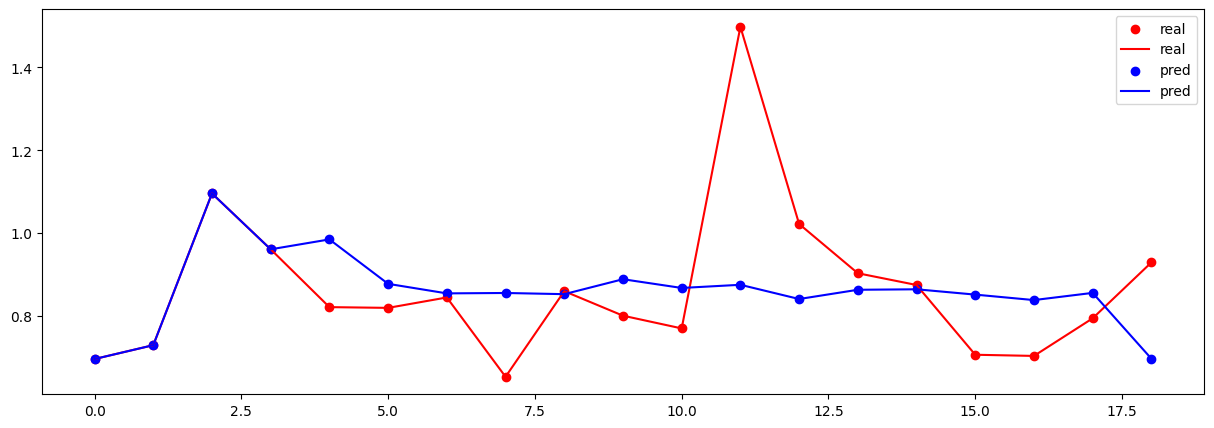

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


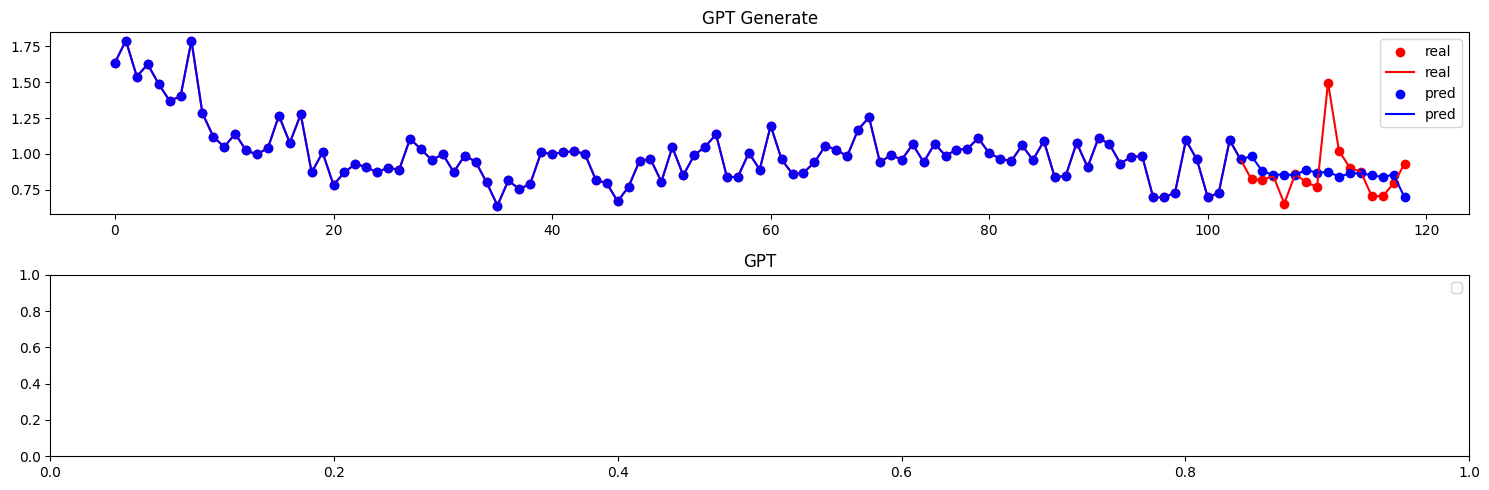

In [60]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  0.7256798148155212
500 train loss =  0.15836872160434723
1000 train loss =  0.07783413678407669
1500 train loss =  0.06690695881843567
2000 train loss =  0.0439007431268692
2500 train loss =  0.03569117933511734
3000 train loss =  0.028941547498106956
3500 train loss =  0.0296352319419384
4000 train loss =  0.02590012736618519
4500 train loss =  0.03024040162563324
5000 train loss =  0.022445879876613617
5500 train loss =  0.019435342401266098
6000 train loss =  0.020289231091737747
6500 train loss =  0.016998406499624252
7000 train loss =  0.016987422481179237
7500 train loss =  0.013957557268440723
8000 train loss =  0.015011935494840145
8500 train loss =  0.014508754946291447
9000 train loss =  0.015706263482570648
9500 train loss =  0.013208752498030663


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


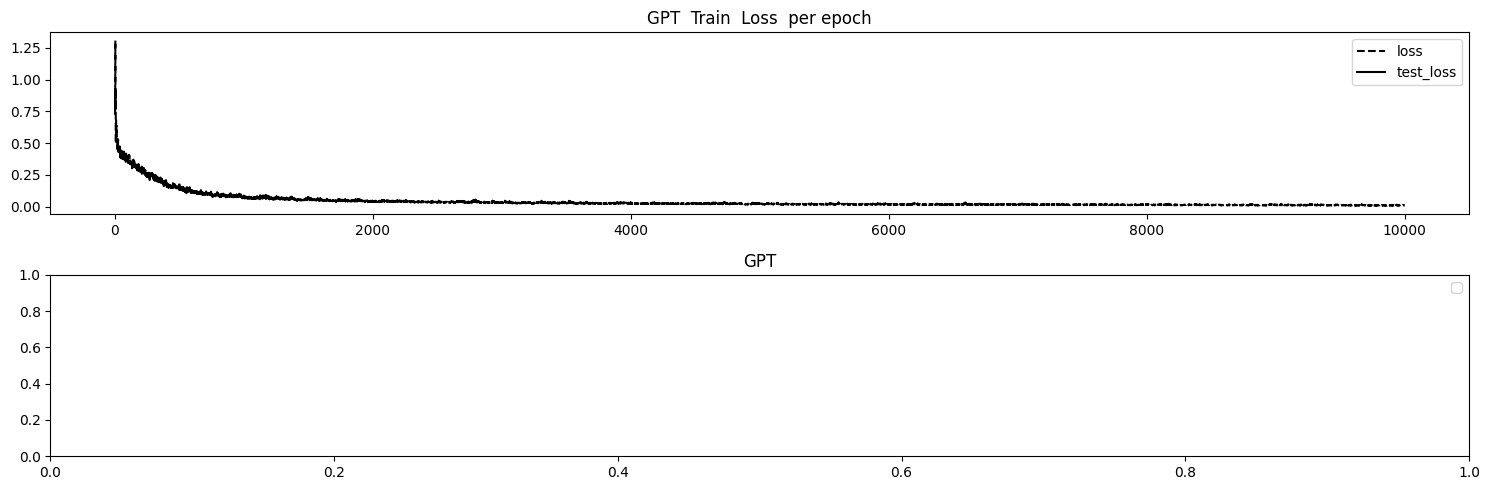

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

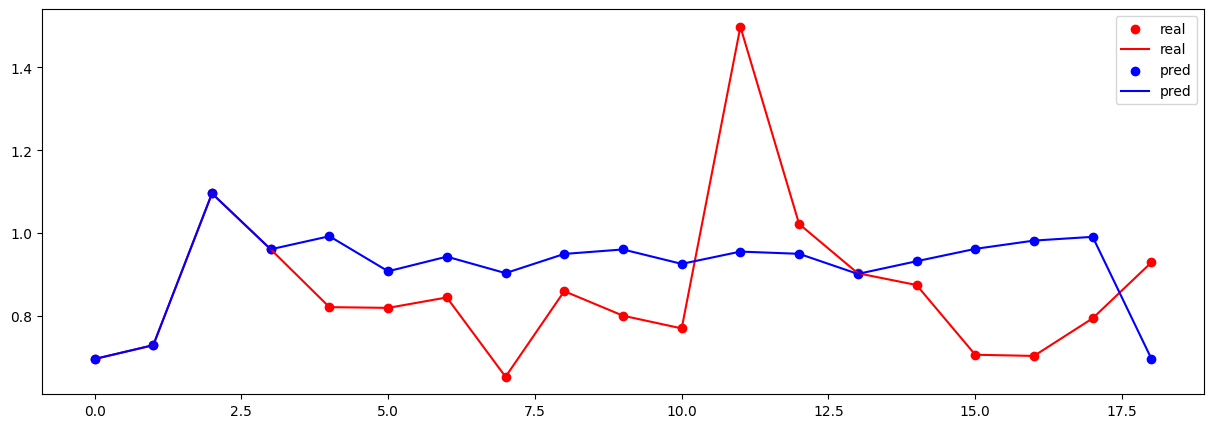

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


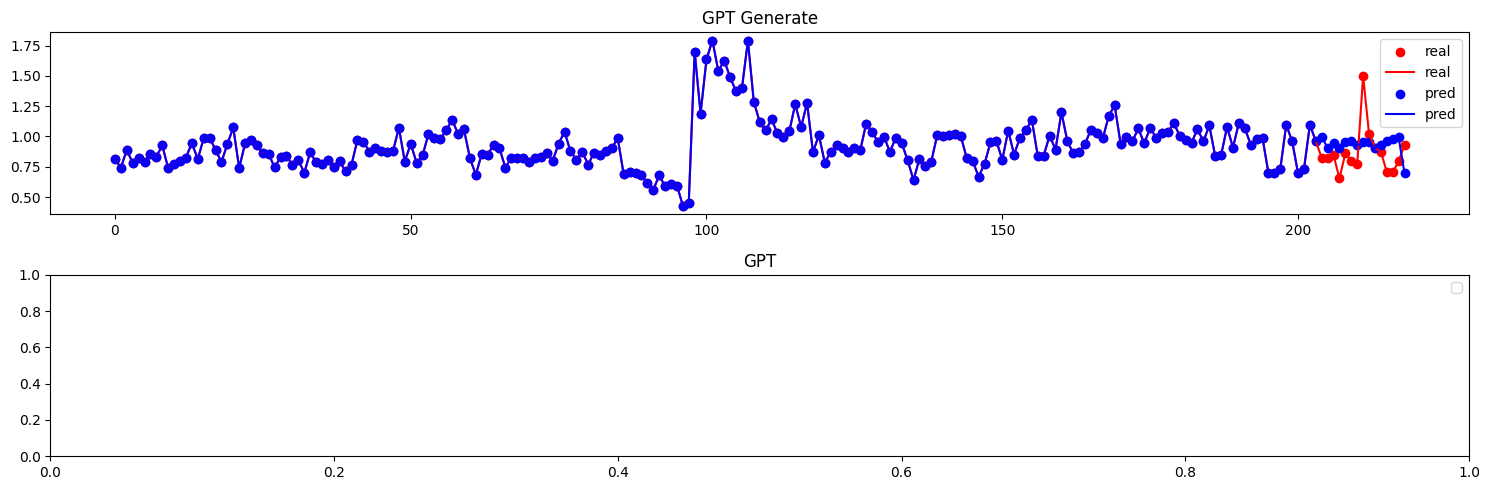

In [61]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 24])
0 train loss =  0.9356791377067566
500 train loss =  0.23838457465171814
1000 train loss =  0.1274995356798172
1500 train loss =  0.08908004313707352
2000 train loss =  0.06134437769651413
2500 train loss =  0.05123245343565941
3000 train loss =  0.045463304966688156
3500 train loss =  0.04217962175607681
4000 train loss =  0.03363430127501488
4500 train loss =  0.031322453171014786
5000 train loss =  0.03605710715055466
5500 train loss =  0.029637444764375687
6000 train loss =  0.02325771562755108
6500 train loss =  0.04138778895139694
7000 train loss =  0.023028744384646416
7500 train loss =  0.0209842287003994
8000 train loss =  0.021140774711966515
8500 train loss =  0.016547314822673798
9000 train loss =  0.01739170402288437
9500 train loss =  0.017893733456730843


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


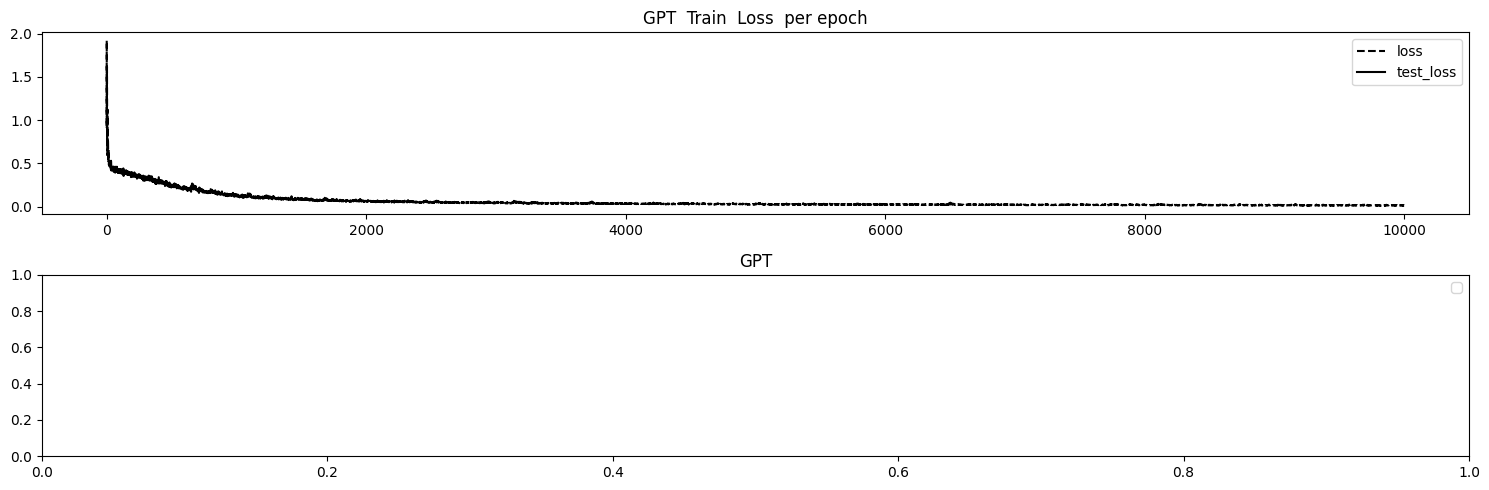

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

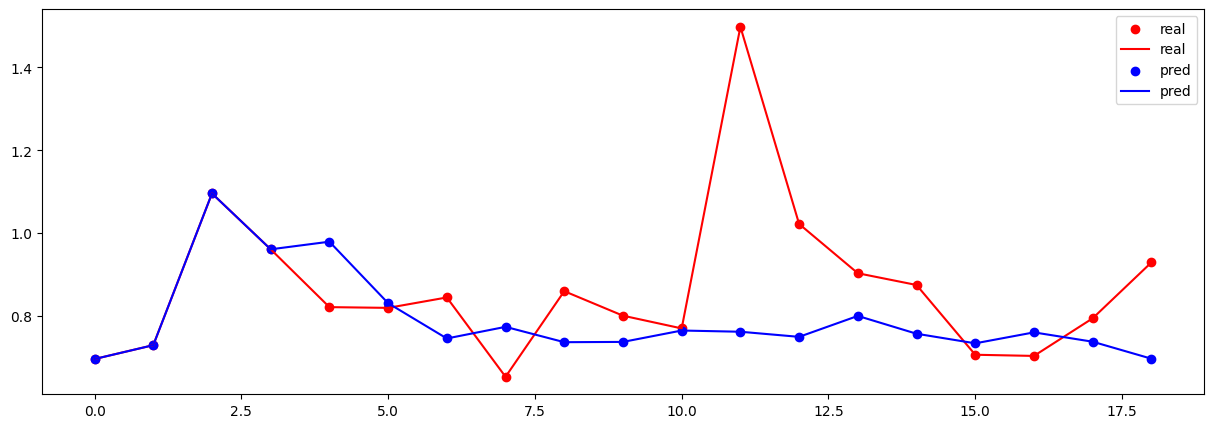

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(300, 24)
319


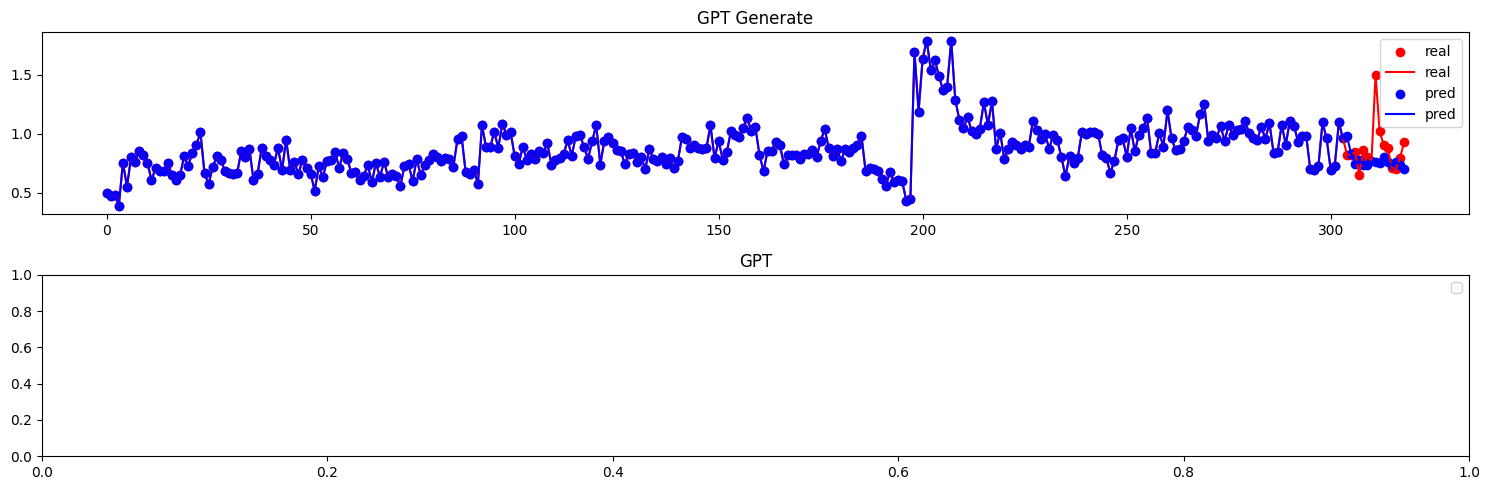

In [62]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([400, 24])
0 train loss =  0.8738797903060913
500 train loss =  0.2950577437877655
1000 train loss =  0.16288508474826813
1500 train loss =  0.11579084396362305
2000 train loss =  0.08422951400279999
2500 train loss =  0.06184321641921997
3000 train loss =  0.058369703590869904
3500 train loss =  0.05046370252966881
4000 train loss =  0.04120970889925957
4500 train loss =  0.031110558658838272
5000 train loss =  0.032178591936826706
5500 train loss =  0.03130784258246422
6000 train loss =  0.025578321889042854
6500 train loss =  0.02400331199169159
7000 train loss =  0.02311655879020691
7500 train loss =  0.025176871567964554
8000 train loss =  0.02479369007050991
8500 train loss =  0.02114388719201088
9000 train loss =  0.019834164530038834
9500 train loss =  0.017597850412130356


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


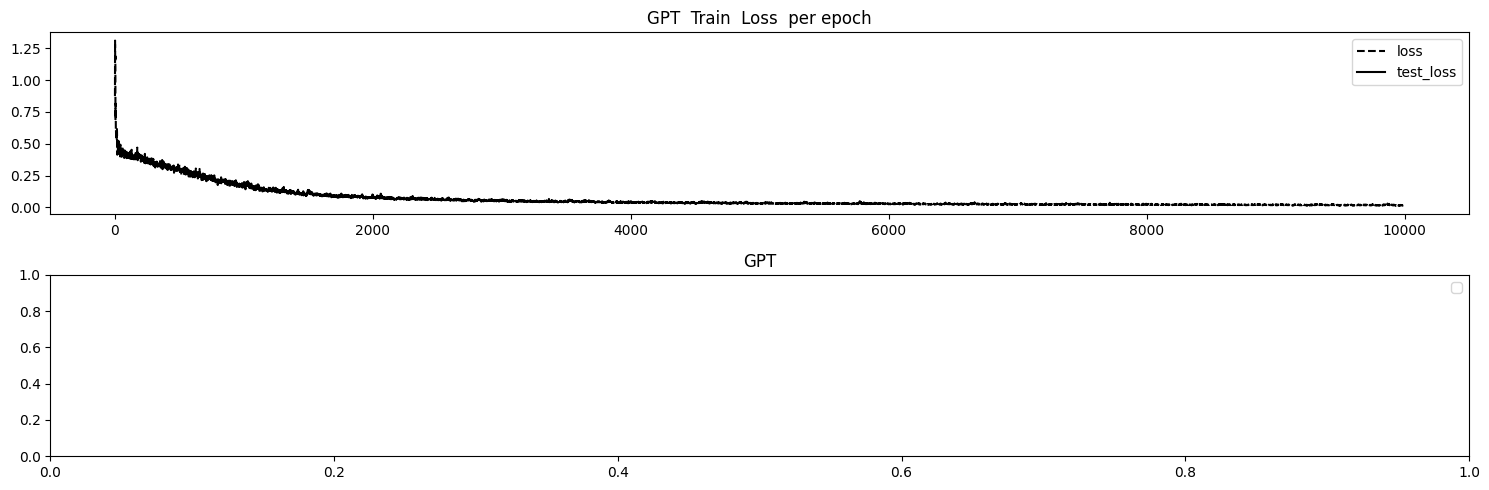

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

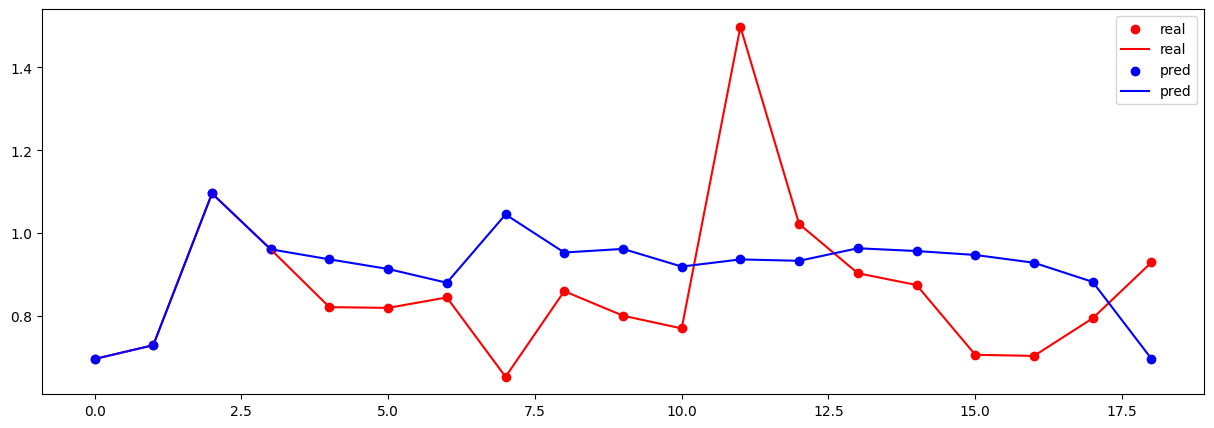

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(400, 24)
419


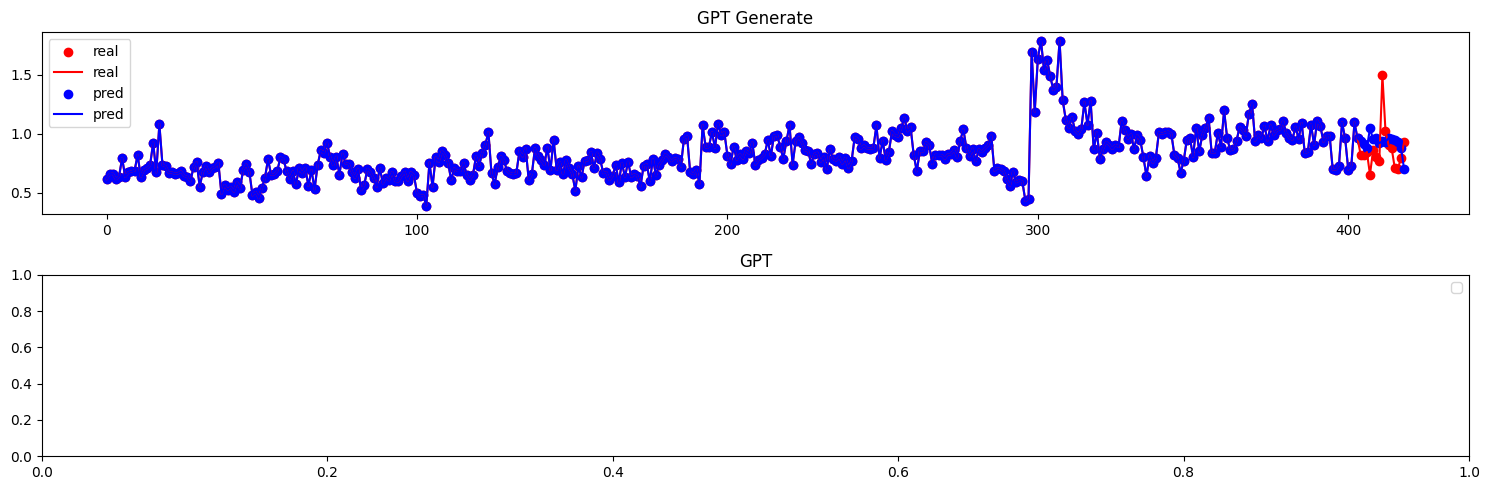

In [63]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 5


In [64]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
833
1248
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.7951413989067078
500 train loss =  0.07559920102357864
1000 train loss =  0.04716255143284798
1500 train loss =  0.033851295709609985
2000 train loss =  0.035454925149679184
2500 train loss =  0.026924630627036095
3000 train loss =  0.026645353063941002
3500 train loss =  0.023131923750042915
4000 train loss =  0.019011367112398148
4500 train loss =  0.014601713977754116
5000 train loss =  0.01552107185125351
5500 train loss =  0.014039117842912674
6000 train loss =  0.012552737258374691
6500 train loss =  0.01262618973851204
7000 train loss =  0.009755898267030716
7500 train loss =  0.0108717055991292
8000 train loss =  0.008764520287513733
8500 train loss =  0.008169625885784626
9000 train loss =  0.00801242608577013
9500 train loss =  0.009278391487896442


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


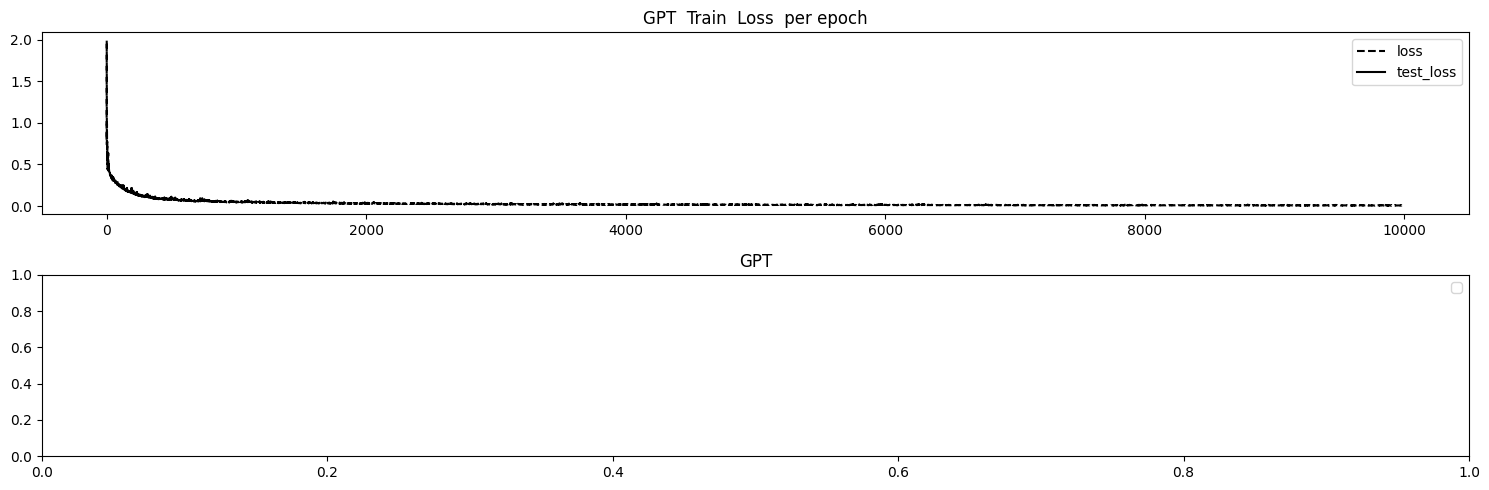

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

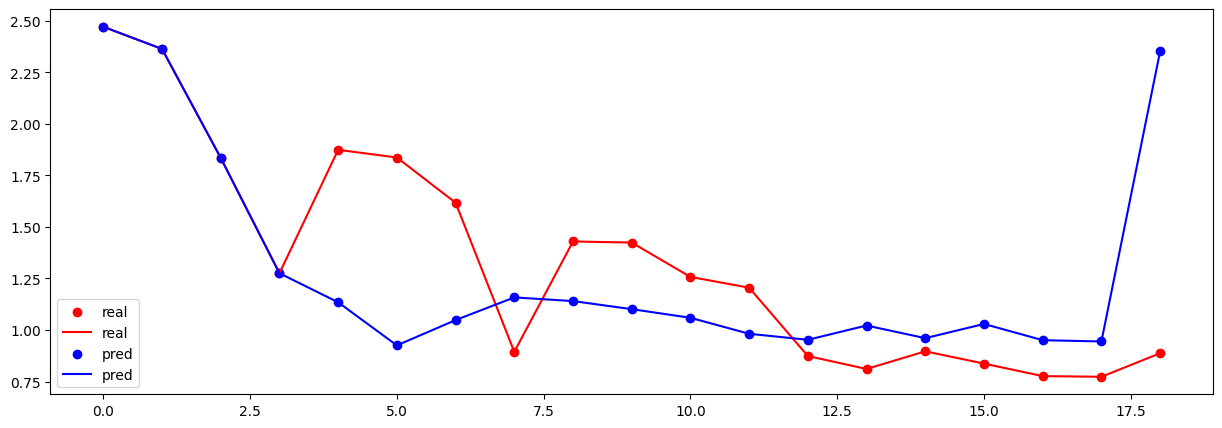

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


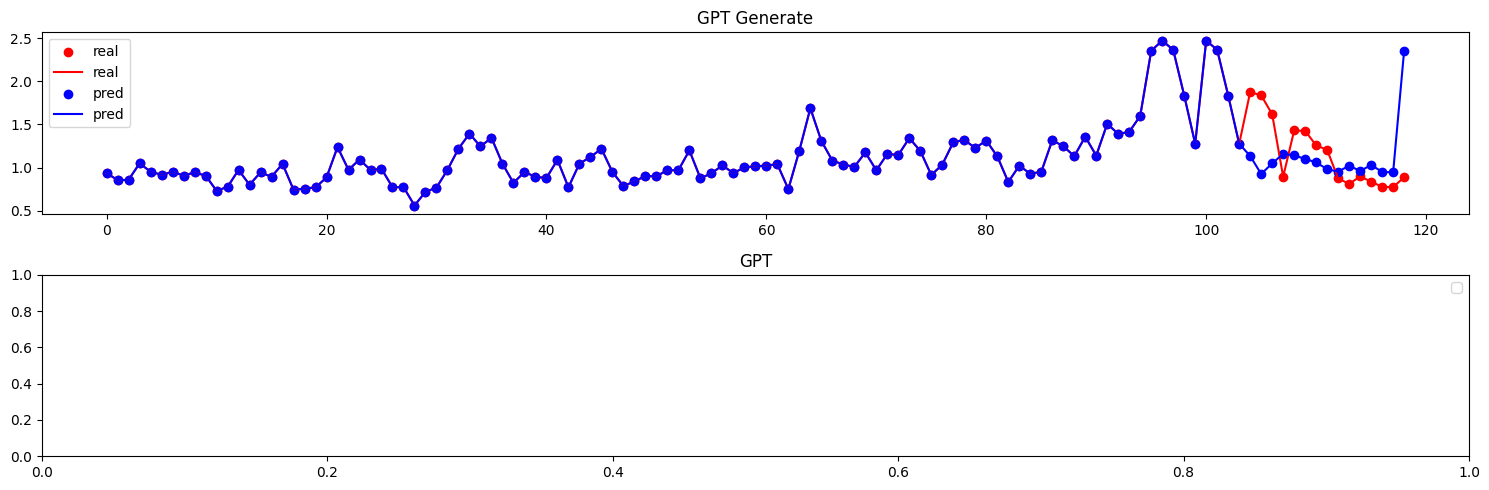

In [65]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.8030341267585754
500 train loss =  0.1792178452014923
1000 train loss =  0.07316379994153976
1500 train loss =  0.05159416422247887
2000 train loss =  0.0472663976252079
2500 train loss =  0.04007669910788536
3000 train loss =  0.037497490644454956
3500 train loss =  0.028820369392633438
4000 train loss =  0.025542166084051132
4500 train loss =  0.025373203679919243
5000 train loss =  0.0208369679749012
5500 train loss =  0.017608722671866417
6000 train loss =  0.01841539330780506
6500 train loss =  0.017723342403769493
7000 train loss =  0.01399492472410202
7500 train loss =  0.0158316008746624
8000 train loss =  0.011831491254270077
8500 train loss =  0.014413416385650635
9000 train loss =  0.015514942817389965
9500 train loss =  0.012418928556144238


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


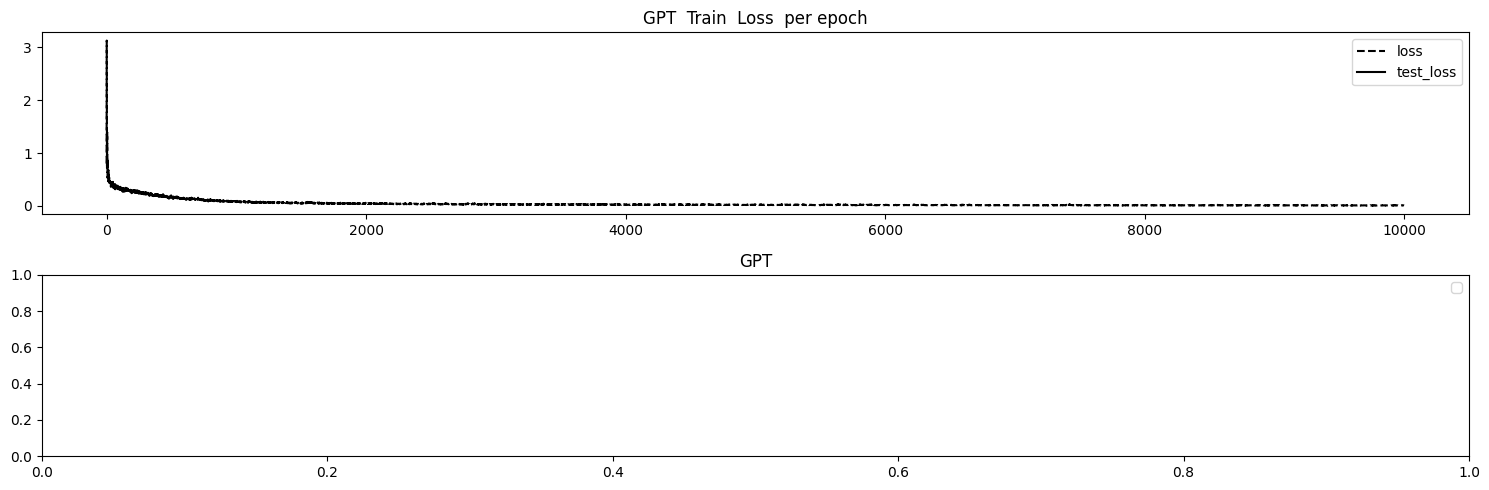

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

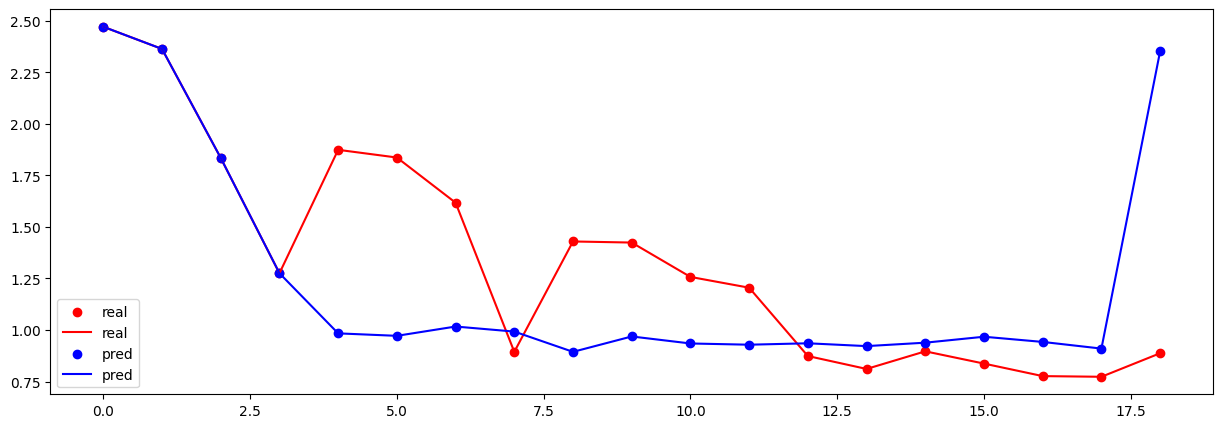

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


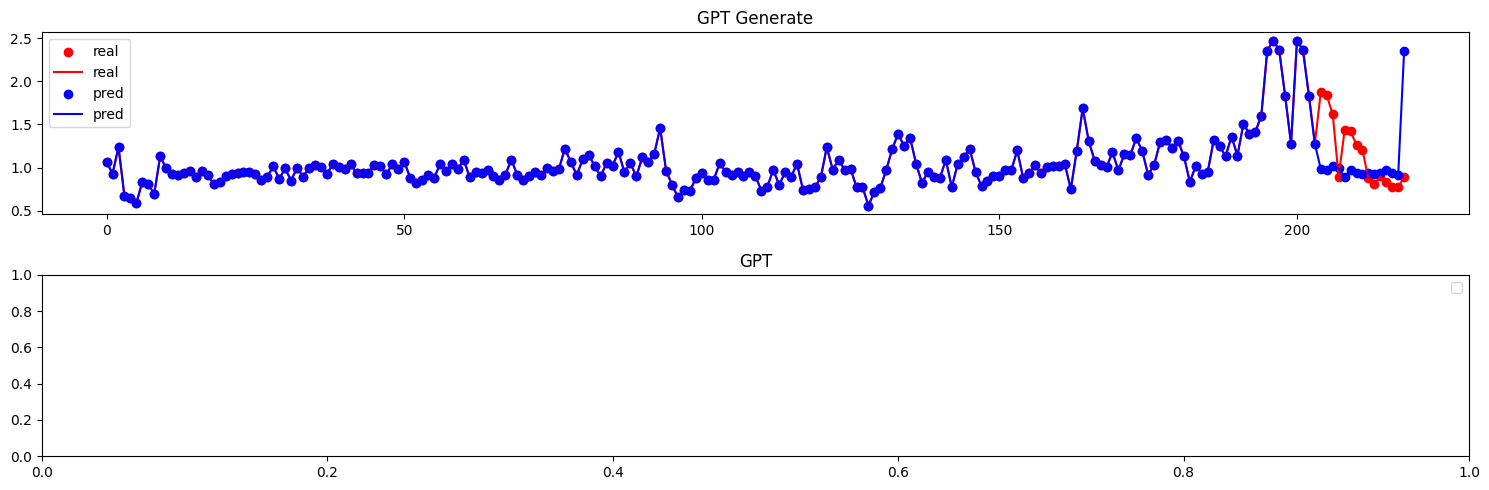

In [66]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 24])
0 train loss =  0.7473613023757935
500 train loss =  0.23731668293476105
1000 train loss =  0.12209320813417435
1500 train loss =  0.07533422112464905
2000 train loss =  0.052694108337163925
2500 train loss =  0.04442034289240837
3000 train loss =  0.03864634409546852
3500 train loss =  0.03729582205414772
4000 train loss =  0.026979606598615646
4500 train loss =  0.02847426012158394
5000 train loss =  0.028128577396273613
5500 train loss =  0.025403279811143875
6000 train loss =  0.021101752296090126
6500 train loss =  0.01824517734348774
7000 train loss =  0.020049849525094032
7500 train loss =  0.019608939066529274
8000 train loss =  0.02316262759268284
8500 train loss =  0.019461898133158684
9000 train loss =  0.016649728640913963
9500 train loss =  0.01713838241994381


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


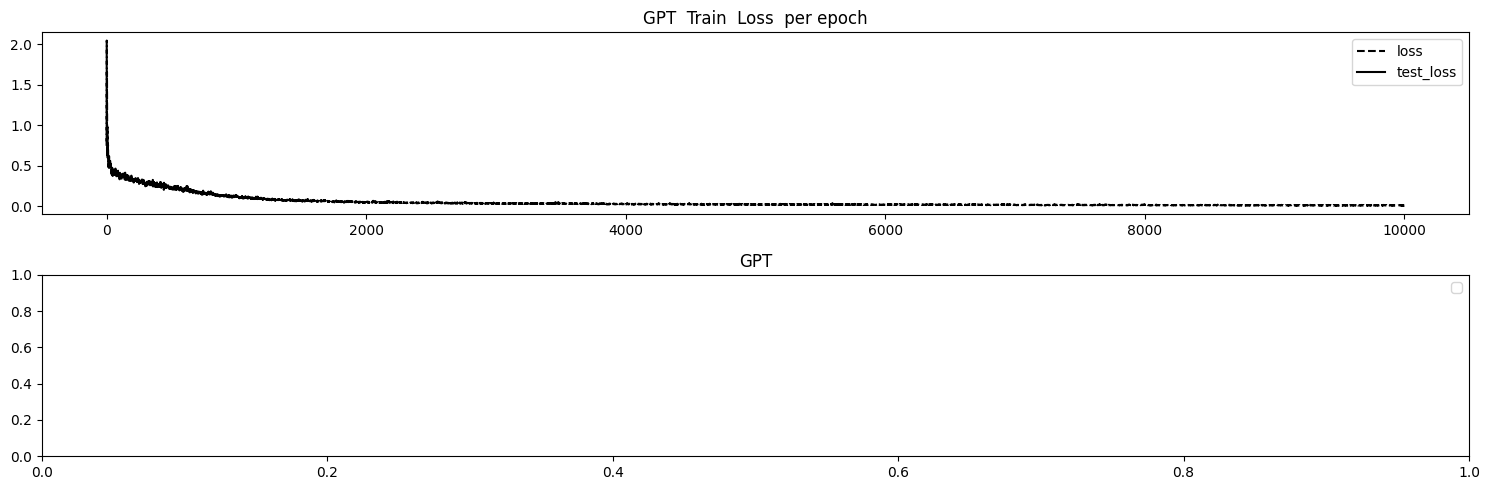

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

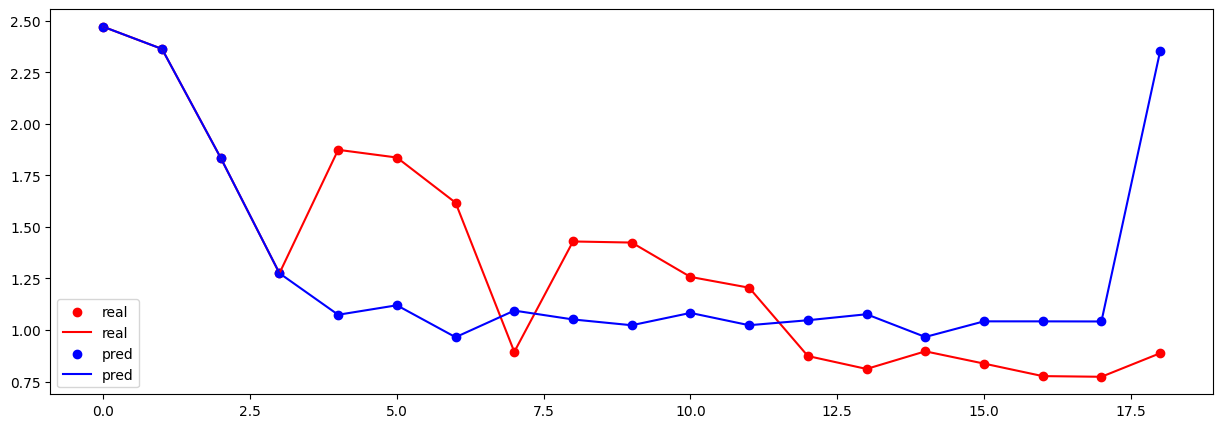

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(300, 24)
319


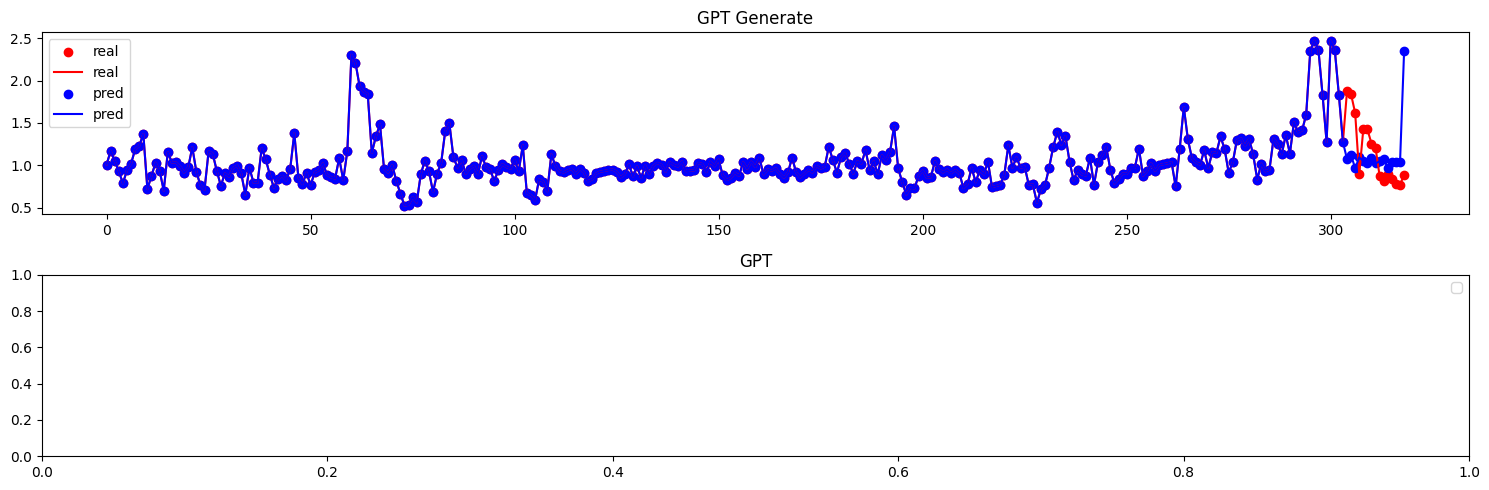

In [67]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8365869522094727
500 train loss =  0.2822626829147339
1000 train loss =  0.14976848661899567
1500 train loss =  0.08163723349571228
2000 train loss =  0.07297486066818237
2500 train loss =  0.050227731466293335
3000 train loss =  0.03830849006772041
3500 train loss =  0.036915671080350876
4000 train loss =  0.037354614585638046
4500 train loss =  0.03102067857980728
5000 train loss =  0.035495270043611526
5500 train loss =  0.03324713930487633
6000 train loss =  0.02615702711045742
6500 train loss =  0.023850396275520325
7000 train loss =  0.027226977050304413
7500 train loss =  0.019767500460147858
8000 train loss =  0.020660150796175003
8500 train loss =  0.022069130092859268
9000 train loss =  0.017960112541913986
9500 train loss =  0.017623208463191986


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


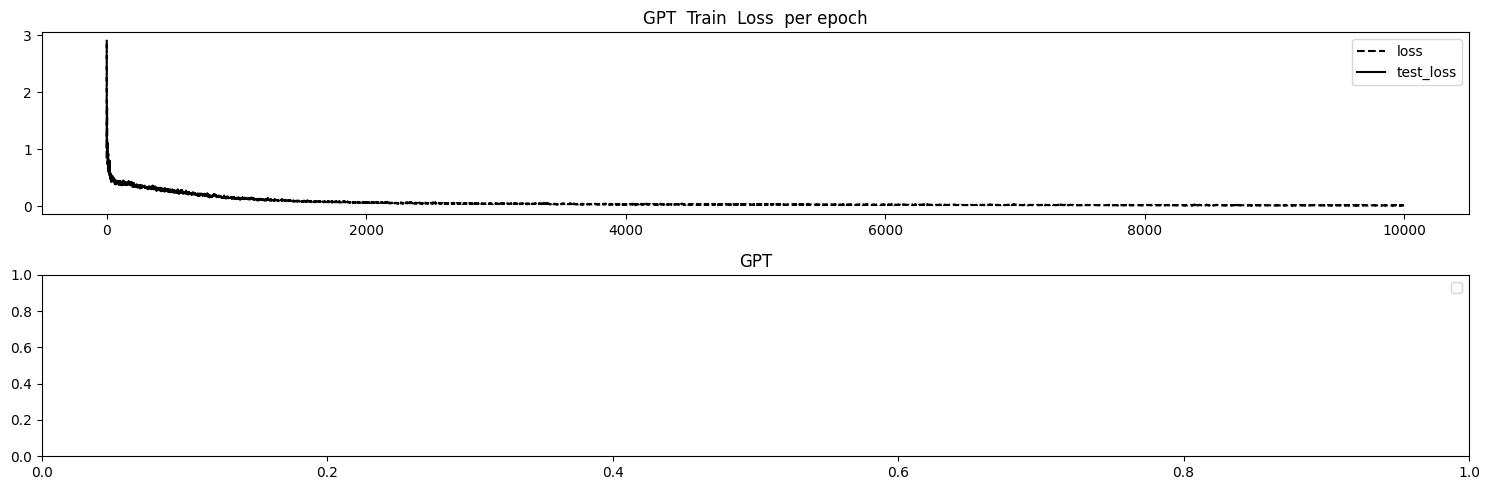

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

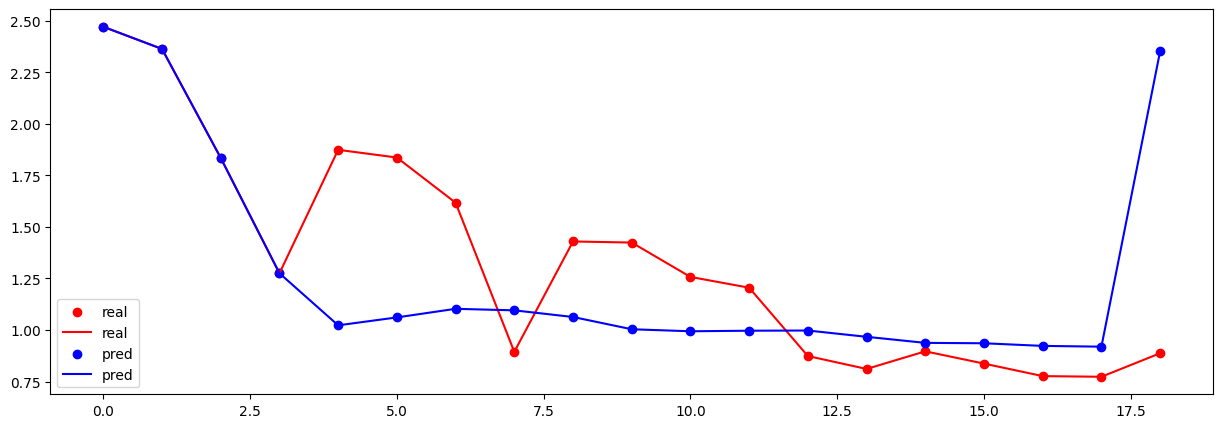

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(400, 24)
419


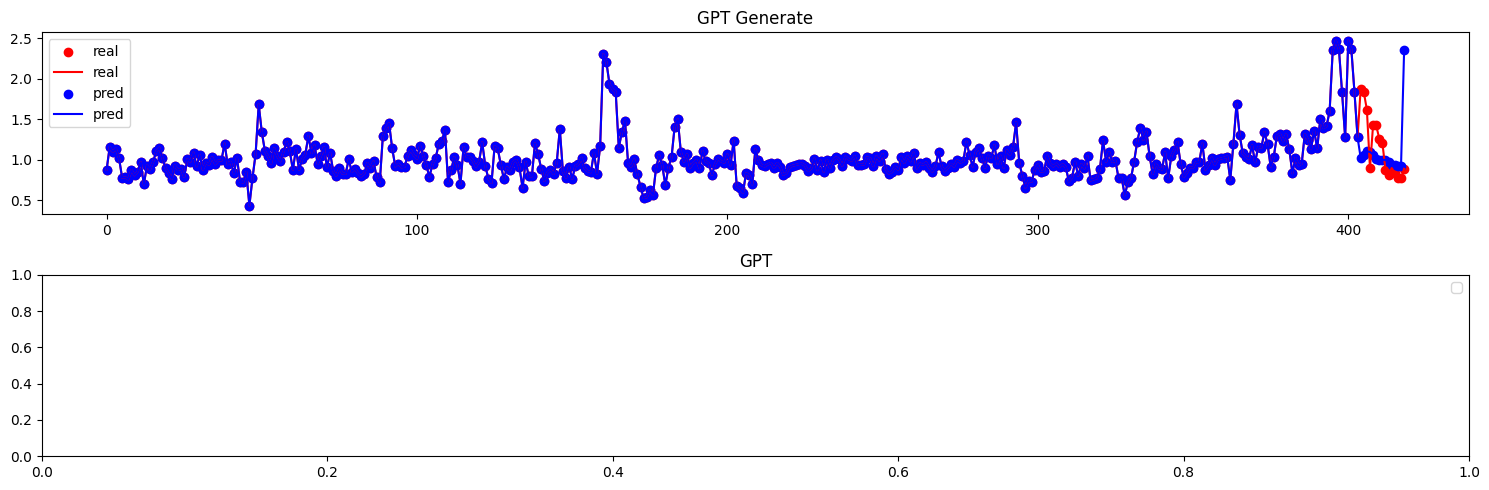

In [68]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 6


In [69]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
193
608
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.901642918586731
500 train loss =  0.10455666482448578
1000 train loss =  0.07234874367713928
1500 train loss =  0.043900441378355026
2000 train loss =  0.03819550946354866
2500 train loss =  0.030896978452801704
3000 train loss =  0.033080436289310455
3500 train loss =  0.02584269642829895
4000 train loss =  0.02194945327937603
4500 train loss =  0.018616192042827606
5000 train loss =  0.016924211755394936
5500 train loss =  0.016460660845041275
6000 train loss =  0.014655856415629387
6500 train loss =  0.014877308160066605
7000 train loss =  0.01184976939111948
7500 train loss =  0.013570896349847317
8000 train loss =  0.009701439179480076
8500 train loss =  0.011487621814012527
9000 train loss =  0.011067361570894718
9500 train loss =  0.011509007774293423


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


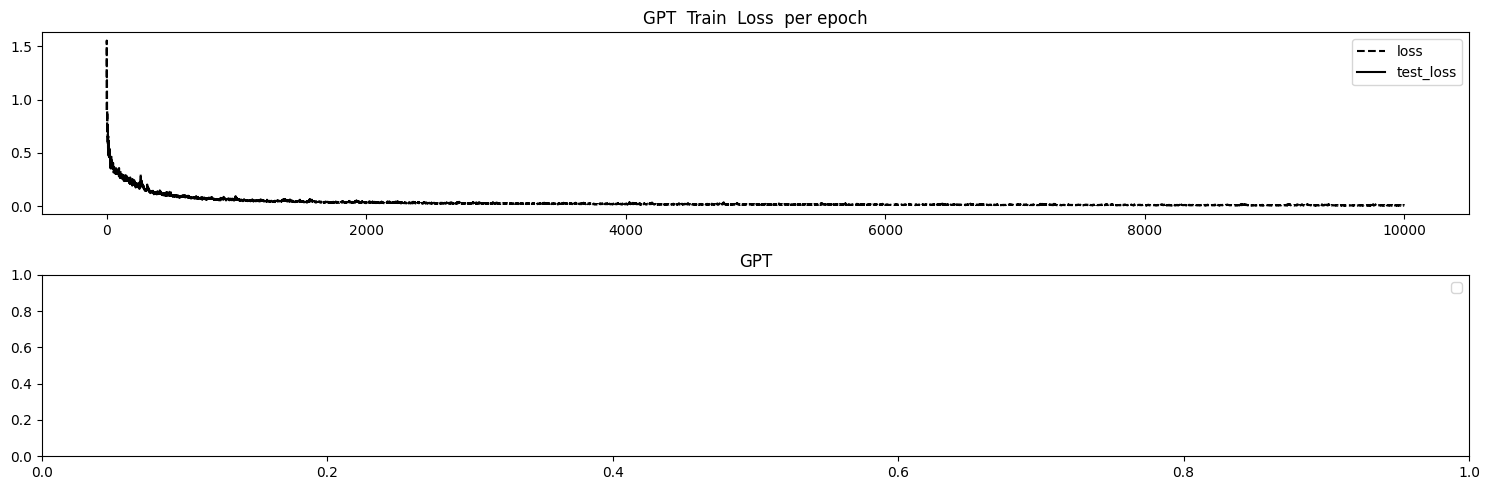

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

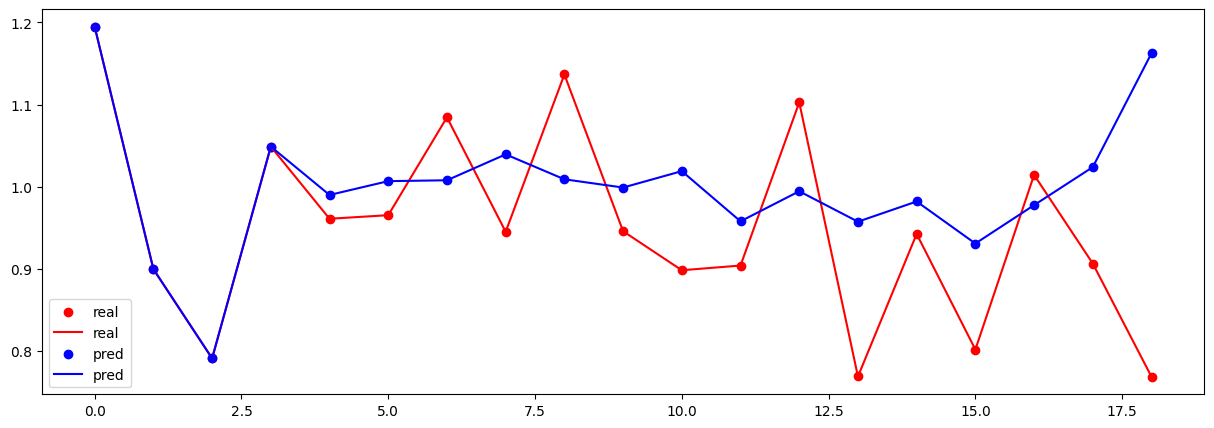

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


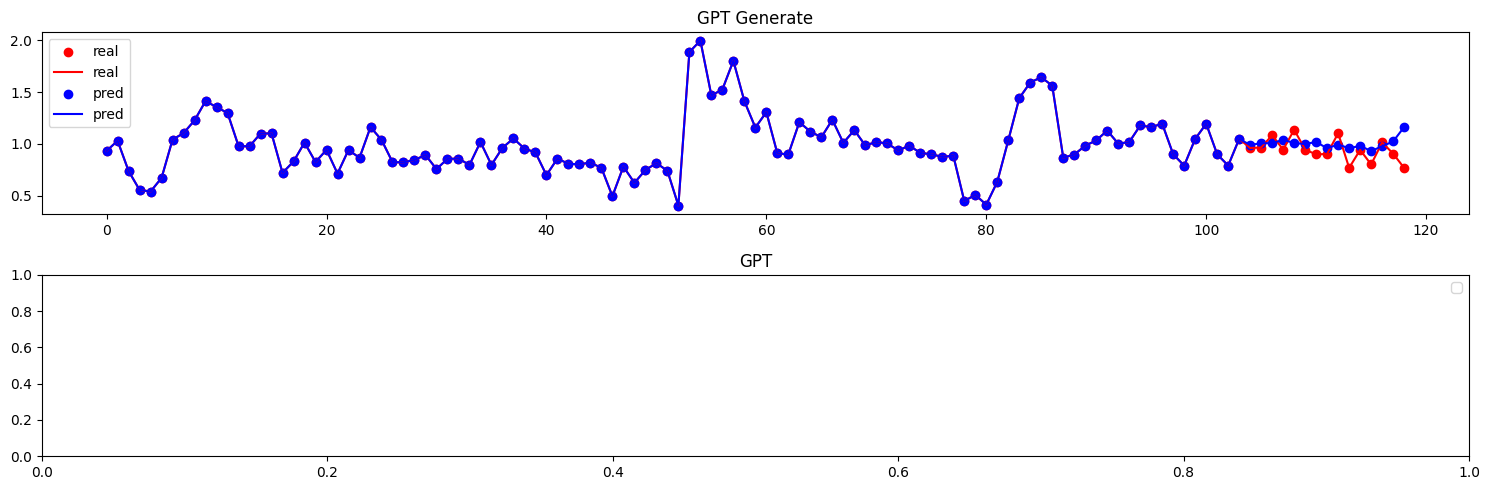

In [70]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.9432088732719421
500 train loss =  0.19058853387832642
1000 train loss =  0.09745299071073532
1500 train loss =  0.06295990943908691
2000 train loss =  0.05444531887769699
2500 train loss =  0.042562805116176605
3000 train loss =  0.03476424515247345
3500 train loss =  0.03289400413632393
4000 train loss =  0.03325541689991951
4500 train loss =  0.028083497658371925
5000 train loss =  0.02499396912753582
5500 train loss =  0.02160249836742878
6000 train loss =  0.019221290946006775
6500 train loss =  0.020842665806412697
7000 train loss =  0.018586691468954086
7500 train loss =  0.016710663214325905
8000 train loss =  0.01765843667089939
8500 train loss =  0.018783139064908028
9000 train loss =  0.012906597927212715
9500 train loss =  0.013719066977500916


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


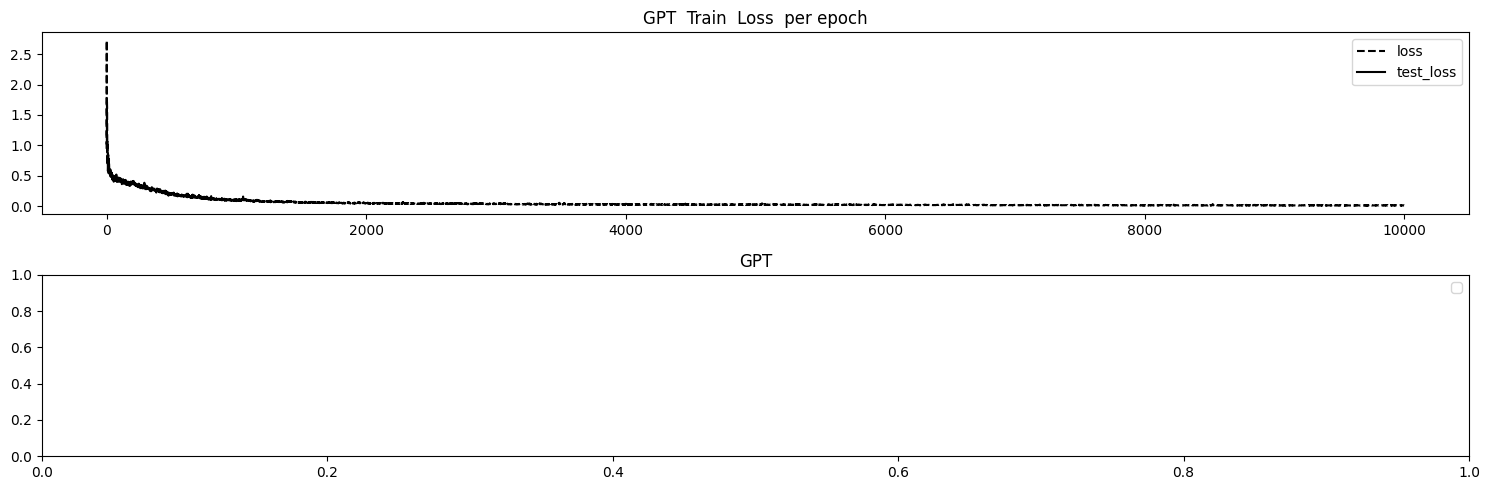

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

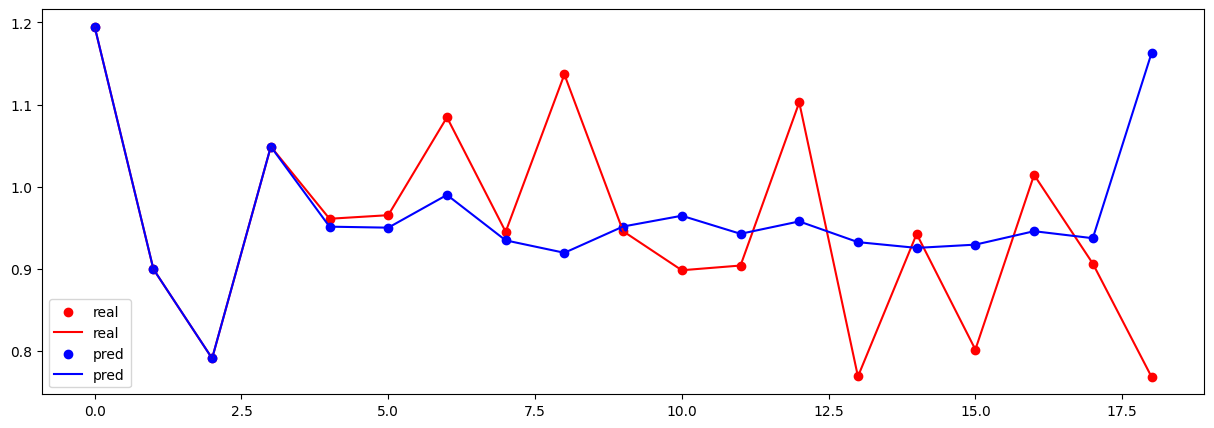

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


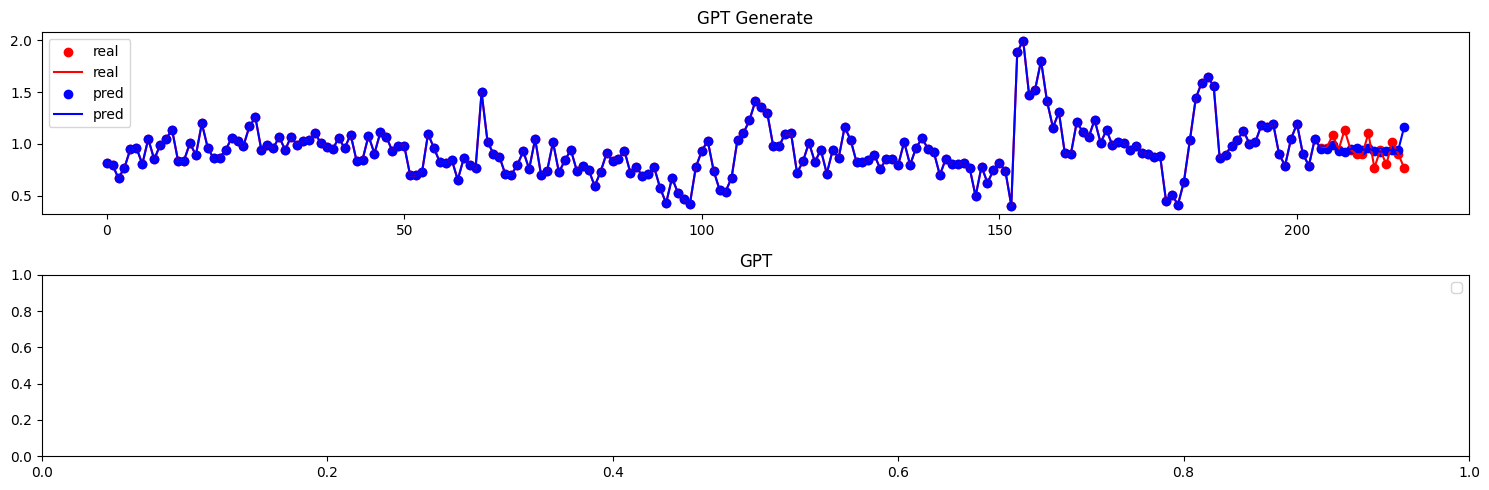

In [71]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 24])
0 train loss =  0.659927248954773
500 train loss =  0.2384643405675888
1000 train loss =  0.12438322603702545
1500 train loss =  0.07196615636348724
2000 train loss =  0.0493326261639595
2500 train loss =  0.05056941136717796
3000 train loss =  0.04438034072518349
3500 train loss =  0.03746823966503143
4000 train loss =  0.03075007162988186
4500 train loss =  0.027062593027949333
5000 train loss =  0.024340977892279625
5500 train loss =  0.024834346026182175
6000 train loss =  0.021161118522286415
6500 train loss =  0.021417712792754173
7000 train loss =  0.020724616944789886
7500 train loss =  0.021663034334778786
8000 train loss =  0.020300352945923805
8500 train loss =  0.013604330830276012
9000 train loss =  0.014757148921489716
9500 train loss =  0.015838583931326866


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


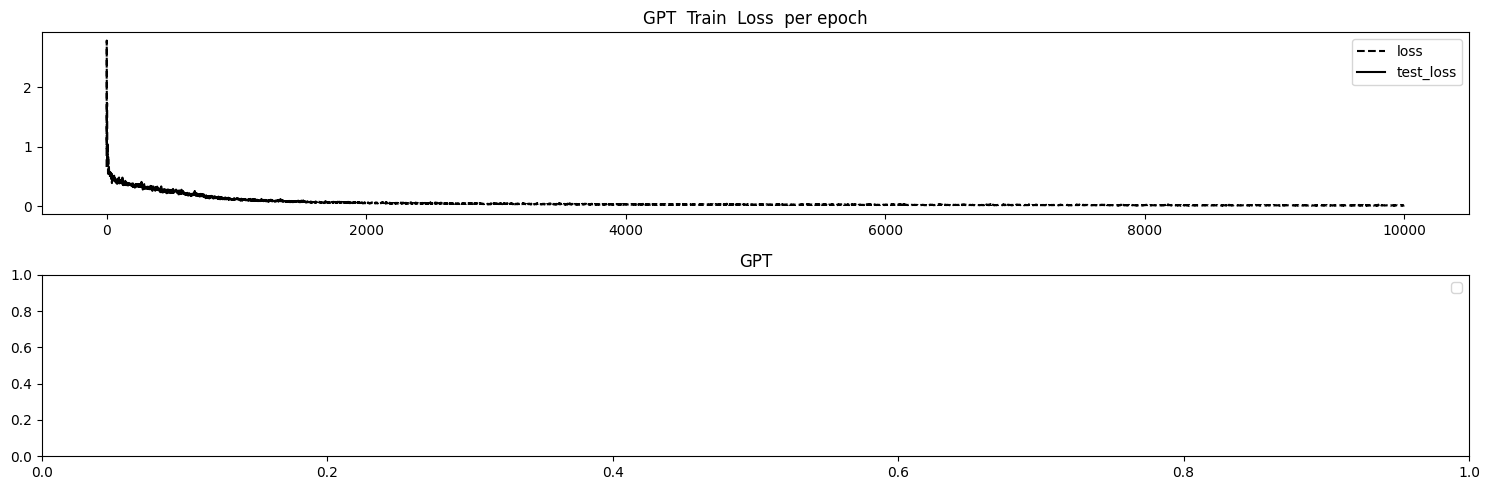

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

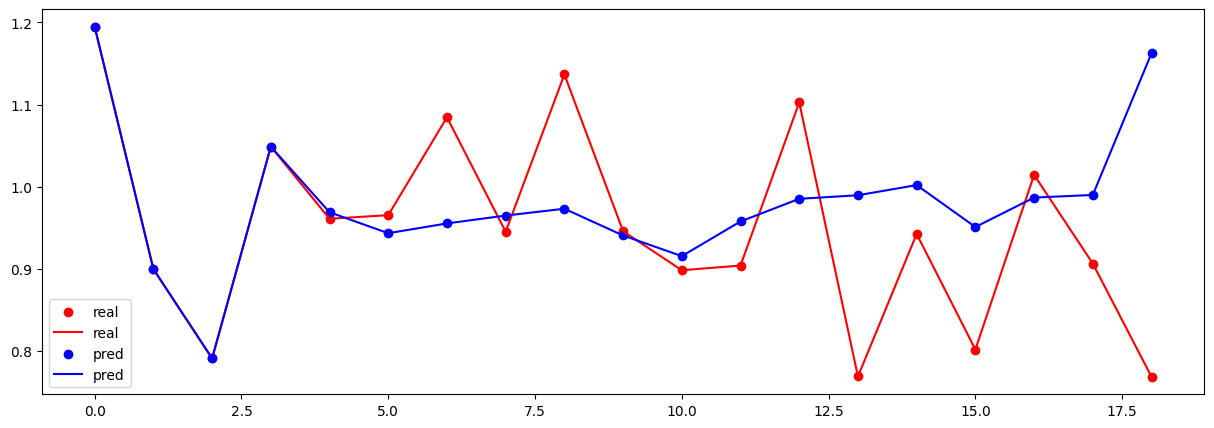

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(300, 24)
319


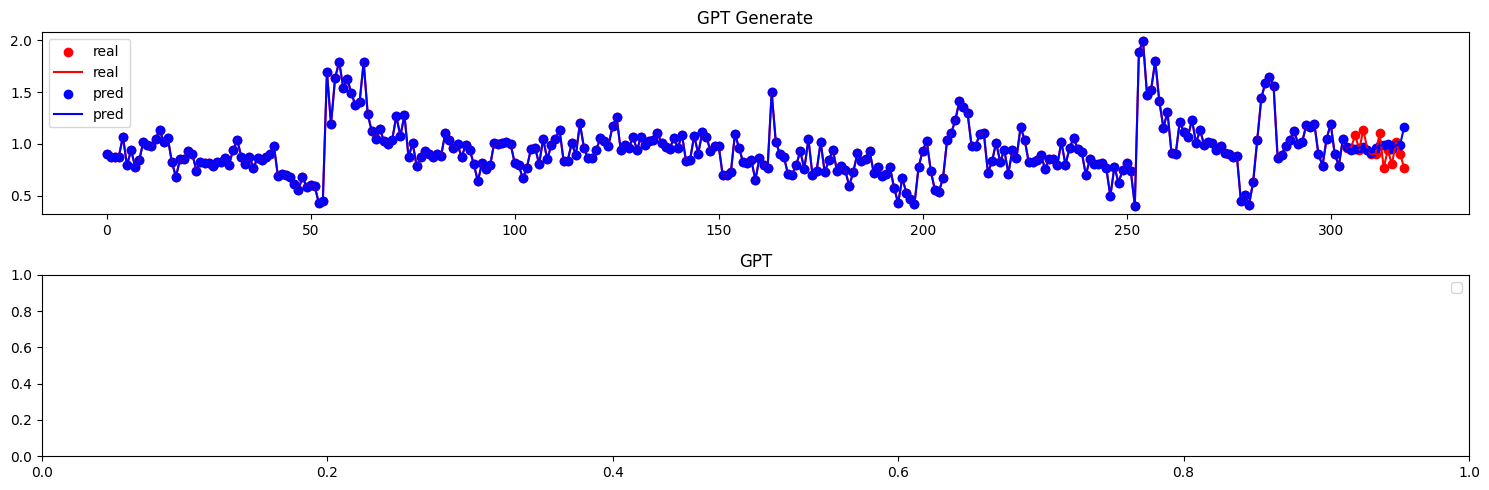

In [72]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8858939409255981
500 train loss =  0.27136358618736267
1000 train loss =  0.1610994040966034
1500 train loss =  0.10837903618812561
2000 train loss =  0.06857184320688248
2500 train loss =  0.059731390327215195
3000 train loss =  0.04658385366201401
3500 train loss =  0.036991167813539505
4000 train loss =  0.03823170065879822
4500 train loss =  0.03416196629405022
5000 train loss =  0.028348809108138084
5500 train loss =  0.027048904448747635
6000 train loss =  0.0347076840698719
6500 train loss =  0.027277009561657906
7000 train loss =  0.024155380204319954
7500 train loss =  0.02019747905433178
8000 train loss =  0.027549970895051956
8500 train loss =  0.02033405378460884
9000 train loss =  0.02242567576467991
9500 train loss =  0.021456429734826088


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


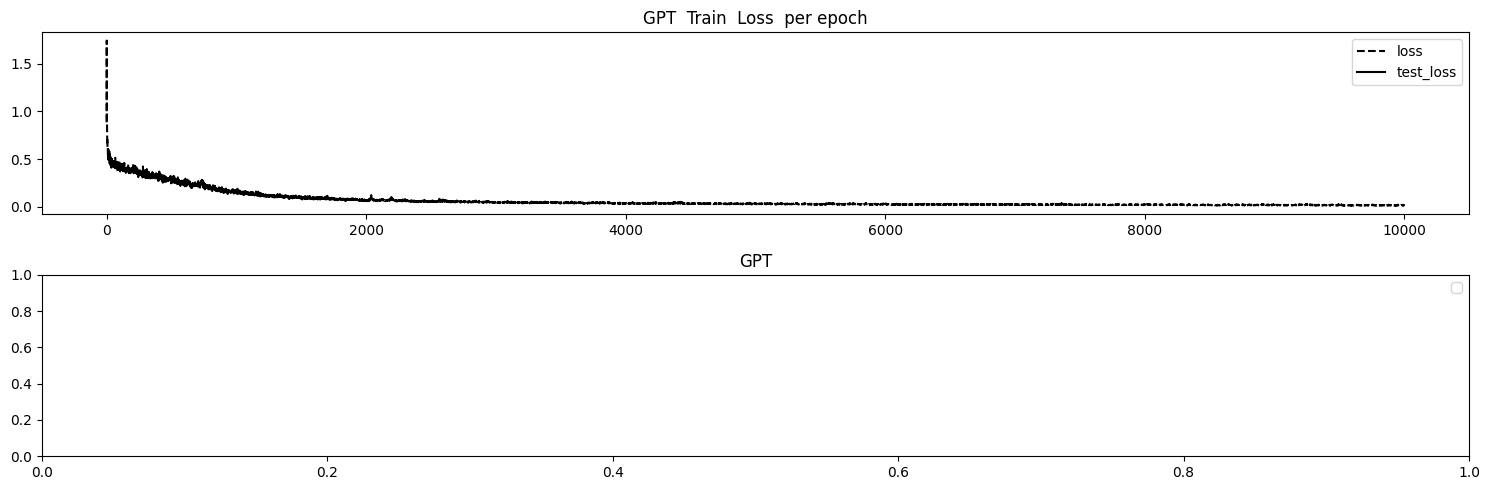

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

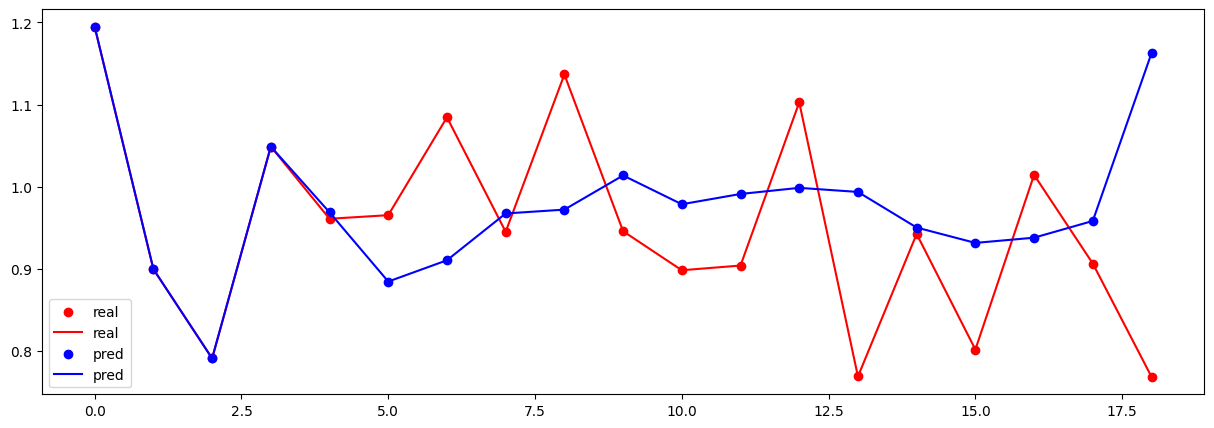

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(400, 24)
419


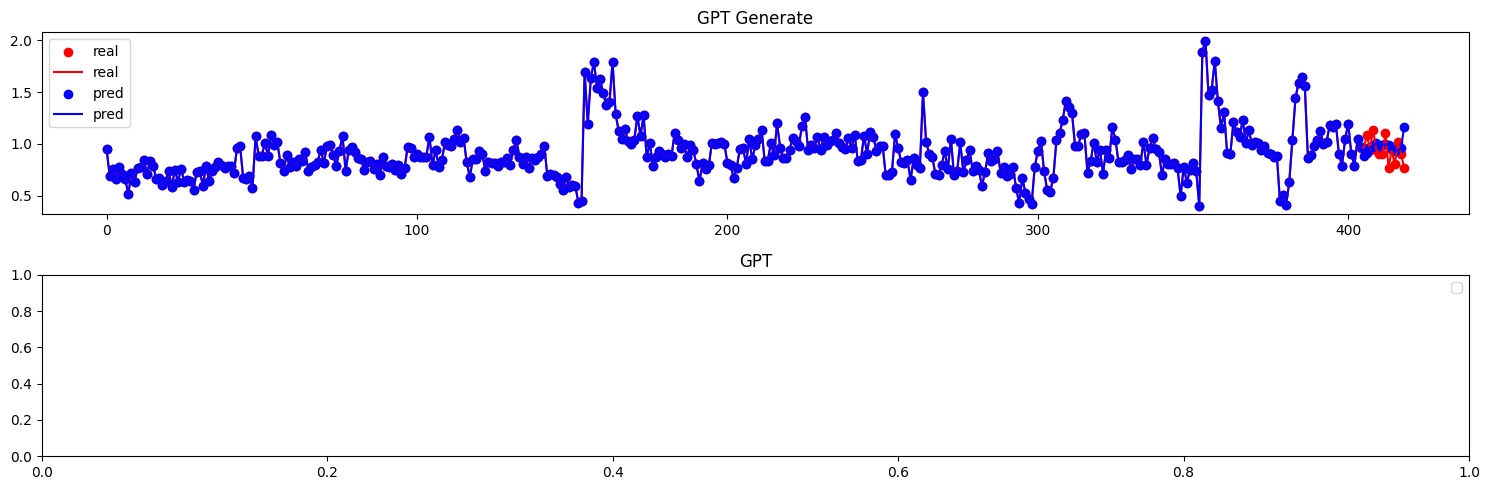

In [73]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
